In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import packages

In [2]:
import pandas as pd
import numpy as np
import math
import string

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime
from datetime import datetime

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

import math

import re
from collections import Counter

from functions import *

# Look at the data

In [3]:
df = pd.read_csv("games_jan2024.csv")

In [4]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [5]:
df['Supported languages'] = df['Supported languages'].apply(lambda x: x.translate(\
                                                      str.maketrans('', '', string.punctuation)).split(sep=' '))
df['Full audio languages'] = df['Full audio languages'].apply(lambda x: x.translate(\
                                                      str.maketrans('', '', string.punctuation)).split(sep=' '))

In [6]:
df.shape

(85103, 39)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

## Features description

`AppID` - Steam application identifier  
`Name` - game name  
`Release date` - game release date  
`Estimated owners` - number of users who have purchased the game  
`Peak CCU` - peak number of users (CCU) for yesterday.  
`Required age` - required age  
`Price` - current price in USD  
`DLC count` - number of add-ons for the game  
`About the game` - game description  
`Supported languages` - list of supported languages  
`Full audio languages` - list of supported audio languages  
`Reviews` - reviews  
`Header image` - header image  
`Website` - game website  
`Support url` - support link for the game  
`Support email` - support email for the game  
`Windows` - available on Windows  
`Mac` - available on Mac  
`Linux` - available on Linux  
`Metacritic score` - score on Metacritic  
`Metacritic url` - link to Metacritic  
`User score` - user score  
`Positive` - number of positive reviews  
`Negative` - number of negative reviews  
`Score rank` - rating of the game based on user reviews  
`Achievements` - number of achievements in the game  
`Recommendations` - number of recommendations  
`Notes` - warnings about the game (e.g., warnings about violence in the game and that it is not intended for young children)  
`Average playtime forever` - average playtime since March 2009. In minutes  
`Average playtime two weeks` - average playtime over the last two weeks. In minutes  
`Median playtime forever` - median playtime since March 2009. In minutes  
`Median playtime two weeks` - median playtime over the last two weeks. In minutes  
`Developers` - comma separated list of the game developers.  
`Publishers` - list of publishers of the game, separated by commas.  
`Categories` - comma separated list of categories  
`Genres` - comma separated list of genres  
`Tags` - comma separated list of game tags  
`Screenshots` - game footage  
`Movies` - game videos

## Descriptive statistics

In [8]:
# for categorical features
df.describe(include=['object', 'bool'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic url,Notes,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
count,85097,85103,85103,81536,85103,85103,9743,85103,39452,41586,71507,85103,85103,85103,3912,13021,81516,81236,80505,81548,64003,83097,78650
unique,84367,4469,14,81100,11306,2240,9646,84994,32199,27297,42081,2,2,2,3814,10570,49870,43366,5648,2471,57101,82988,78579
top,Shadow of the Tomb Raider: Definitive Edition,"Jul 14, 2023",0 - 20000,Help the beautiful girls to immerse themselves...,[English],[],“The most ambitious in the modern trilogy” 9/1...,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.facebook.com/8FloorGames/,https://www.facebook.com/8FloorGames,info@bigfishgames.com,True,False,False,https://www.metacritic.com/game/pc/shadow-of-t...,Nakedness. All characters appearing in this ga...,Choice of Games,Big Fish Games,Single-player,"Casual,Indie","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
freq,20,102,55285,64,43539,49464,20,20,274,298,325,85073,68710,73907,20,117,154,499,23990,4811,302,20,20


In [9]:
# for numerical features
df.describe(include=['int64','float64'], 
            percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1%,3.739020e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5%,3.197310e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
10%,4.320440e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


**Irrelevant features (can be deleted):**
- **User score, Score rank** - values are only available for a few ten games
- **Average playtime two weeks, Median playtime two weeks, Peak CCU** - outdated features
- **Header image, Website, Support url, Support email, Metacritic url, Screenshots, Movies** - links/addresses

In [10]:
df = df.drop(columns=["User score", "Score rank", "Average playtime two weeks", 
                      "Median playtime two weeks", "Peak CCU", "Header image", 
                      "Website", "Support url", "Support email", "Metacritic url", 
                      "Screenshots", "Movies"])

# Single factor analysis

### Fix the date format in the Release_date column

In [11]:
df['Release_date'] = [date_change_format(date) for date in df['Release date']]

In [12]:
df[['Release date', 'Release_date']]

,Release date,Release_date
0,"Oct 21, 2008",2008-10-01
1,"Oct 12, 2017",2017-10-01
2,"Nov 17, 2021",2021-11-01
3,"Jul 23, 2020",2020-07-01
4,"Feb 3, 2020",2020-02-01
...,...,...
85098,"Jan 2, 2024",2024-01-01
85099,"Jan 3, 2024",2024-01-01
85100,"Jan 4, 2024",2024-01-01
85101,"Jan 8, 2024",2024-01-01


### Release_date distribution plot

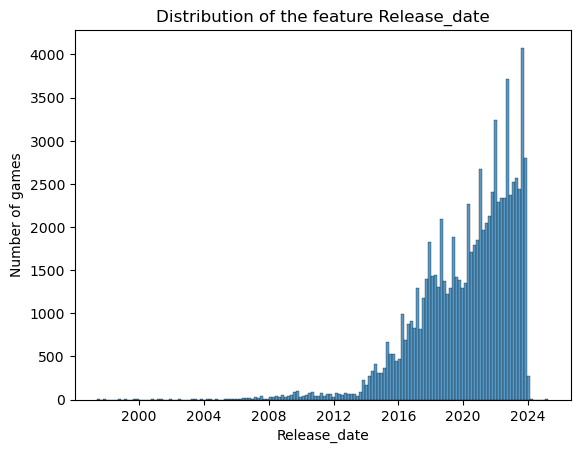

In [13]:
make_histplot('Release_date', df, 'Release_date')

**Most of the games in the sample are games released after 2014**

### Estimated owners

In [14]:
df["Estimated owners"].value_counts()

Estimated owners
0 - 20000                55285
0 - 0                    11504
20000 - 50000             7808
50000 - 100000            3886
100000 - 200000           2566
200000 - 500000           2142
500000 - 1000000           906
1000000 - 2000000          521
2000000 - 5000000          329
5000000 - 10000000          92
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64

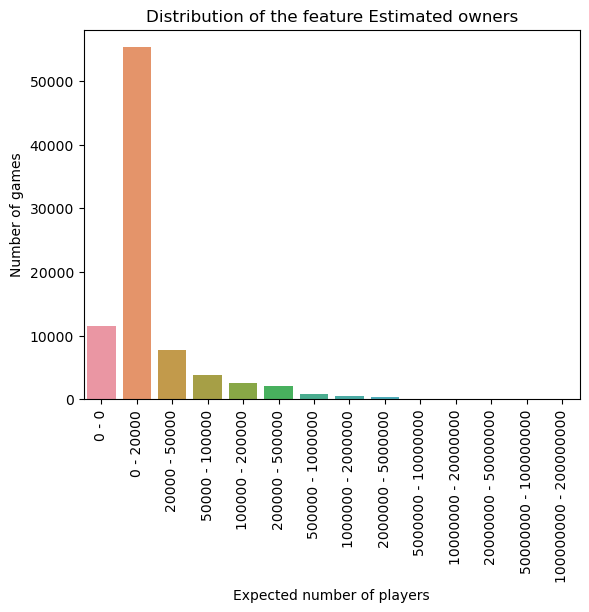

In [15]:
make_countplot('Estimated owners', df, 'Expected number of players', 
               sort_range(df['Estimated owners']), rotation=True)

**The sample mainly includes unpopular games with a small number of players**

### Required age

In [16]:
df["Required age"].value_counts()

Required age
0     83463
17      919
18      333
13      204
16       68
10       35
12       34
3         8
15        8
7         7
14        6
6         6
21        5
20        2
5         1
1         1
19        1
9         1
11        1
Name: count, dtype: int64

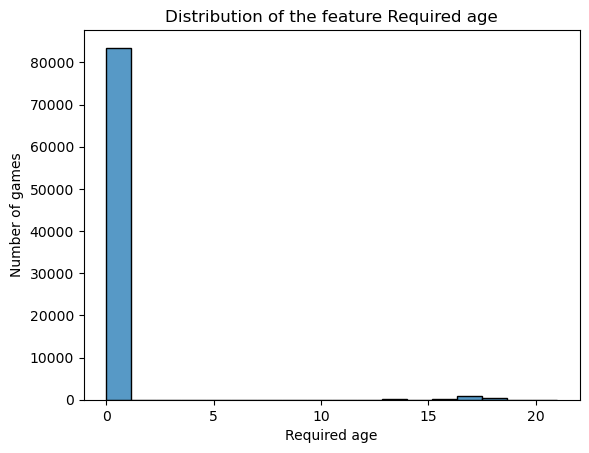

In [17]:
make_histplot('Required age', df, 'Required age')

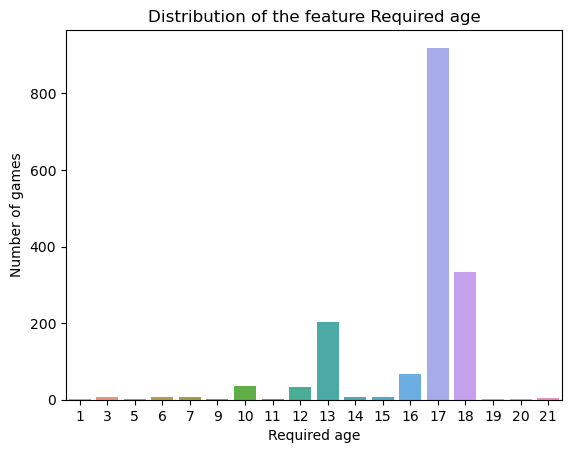

In [18]:
make_countplot('Required age', df[df["Required age"] != 0], 'Required age', 
               order=sorted(df["Required age"].unique())[1:])

**Most age-restricted games have an age limit of 17/18.**

### Price

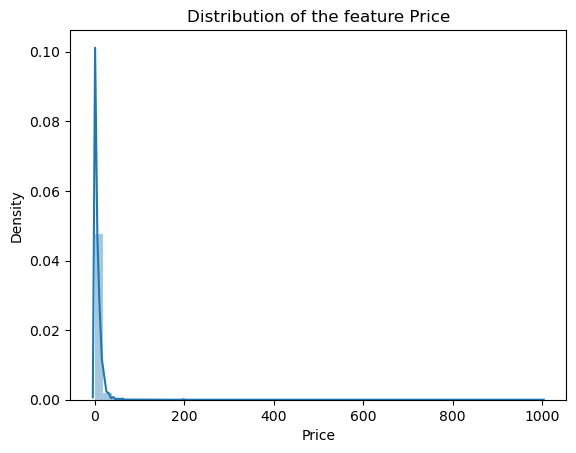

In [19]:
make_distplot('Price', df, 'Price')

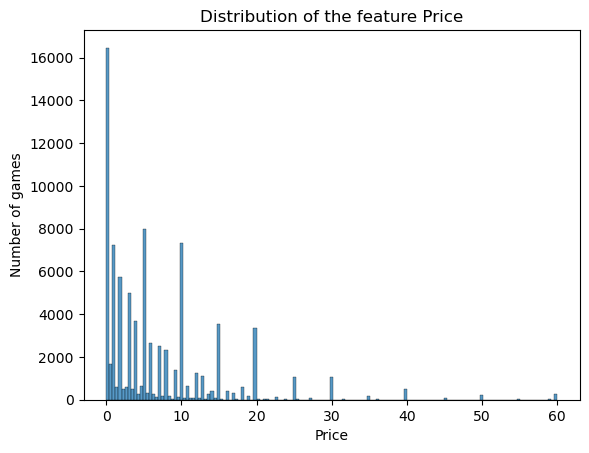

In [20]:
make_histplot('Price', df.loc[(df["Price"] < 60)], 'Price')

**Clearly see groups of games by cost:**
- free
- about 5 dollars
- about 10 dollars
- about 15 dollars
- about 20 dollars
- about 25 dollars
- about 30 dollars
etc.

In [21]:
df["Price_Group"] = [make_price_groups(price) for price in df["Price"]]

In [22]:
df[["Price", "Price_Group"]]

,Price,Price_Group
0,19.99,< 20$
1,0.99,< 5$
2,4.99,< 5$
3,5.99,< 10$
4,0.00,Free
...,...,...
85098,0.00,Free
85099,0.00,Free
85100,0.00,Free
85101,3.99,< 5$


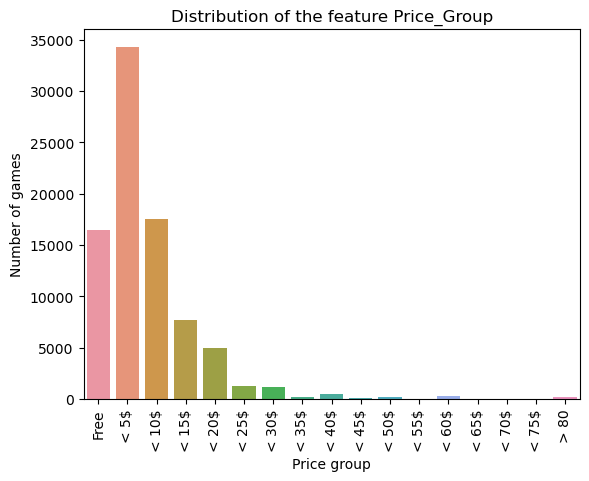

In [23]:
make_countplot('Price_Group', df, 'Price group', 
               sort_prices(df['Price_Group']), rotation=True)

**Most of the sample includes inexpensive games under $15**

### DLC count
additional paid in-game content

In [24]:
df['DLC count'].value_counts()

DLC count
0      73263
1       7596
2       1884
3        716
4        395
       ...  
579        1
87         1
190        1
149        1
90         1
Name: count, Length: 95, dtype: int64

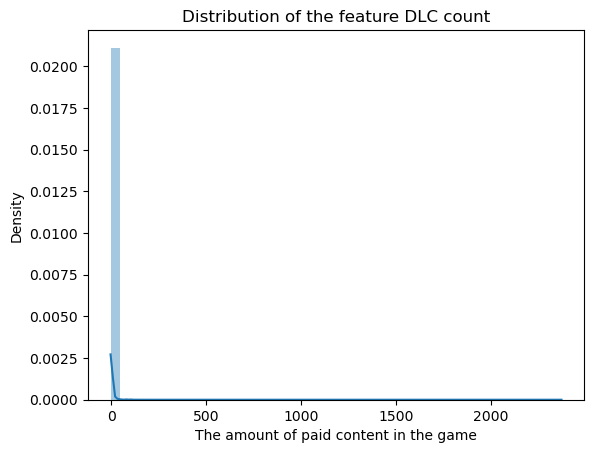

In [25]:
make_distplot('DLC count', df, 'The amount of paid content in the game')

**For most games, there is no additional paid content. Let's look at the distribution chart for games with paid content separately:**

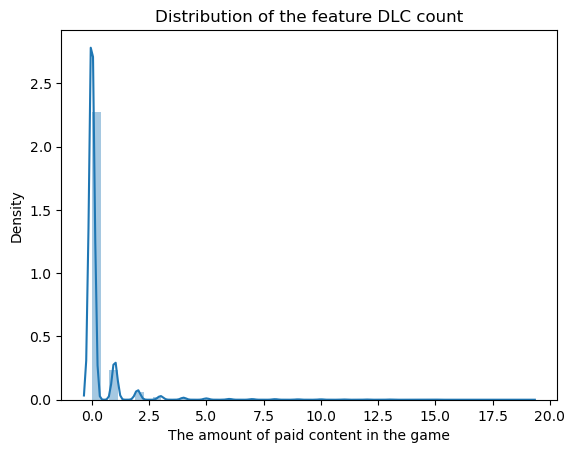

In [26]:
make_distplot('DLC count', df, 'The amount of paid content in the game', 
              x_min = -0.1, x_max = 20)

### Supported languages

In [27]:
df['Supported languages']

0                                                [English]
1        [English, French, Italian, German, Spanish, , ...
2                          [English, Portuguese, , Brazil]
3        [English, French, Italian, German, Spanish, , ...
4                              [English, Spanish, , Spain]
                               ...                        
85098                                   [English, Finnish]
85099                                            [English]
85100                                            [English]
85101                                            [English]
85102                                            [English]
Name: Supported languages, Length: 85103, dtype: object

In [28]:
df['Num Supported languages'] = [len(list(i)) for i in df['Supported languages']]

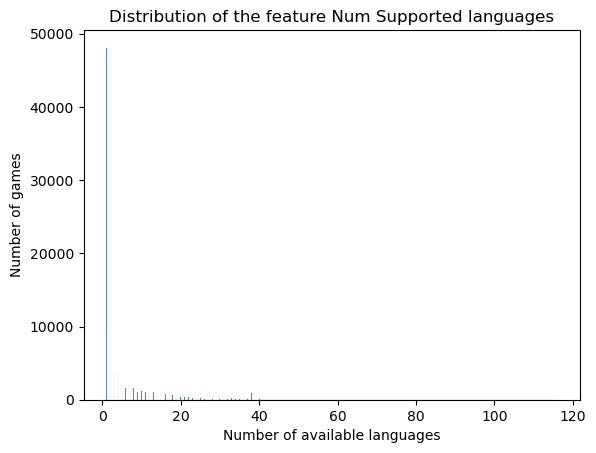

In [29]:
make_histplot('Num Supported languages', 
              df, 'Number of available languages')

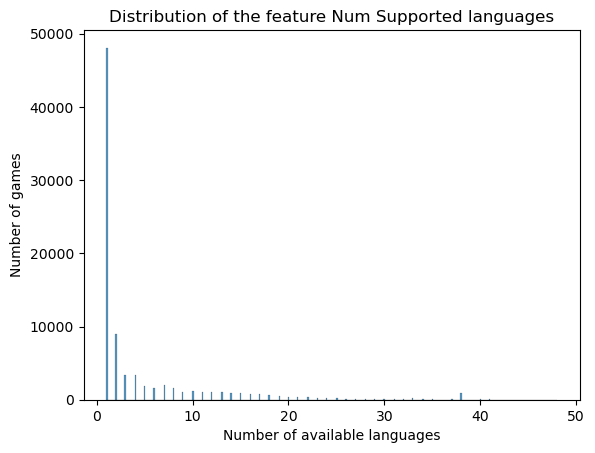

In [30]:
make_histplot('Num Supported languages', 
              df[df['Num Supported languages'] < 60], 
              'Number of available languages')

**Mainly the game translation is available in about 10 languages**

In [31]:
df, sorted_text_lang_df = make_set('Supported languages', 
                                   'text_languages_set', df)

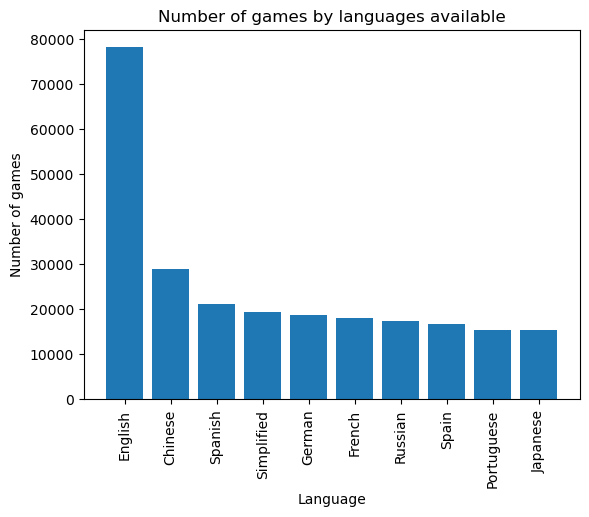

In [32]:
make_barplot('Supported languages', df, 'Language', 
             'languages available', rotation=True)

### Full audio languages

In [33]:
df['Num Full audio languages'] = [len(list(i)) for i in df['Full audio languages']]

In [34]:
df['Num Full audio languages']

0        1
1        1
2        1
3        1
4        1
        ..
85098    1
85099    1
85100    1
85101    1
85102    1
Name: Num Full audio languages, Length: 85103, dtype: int64

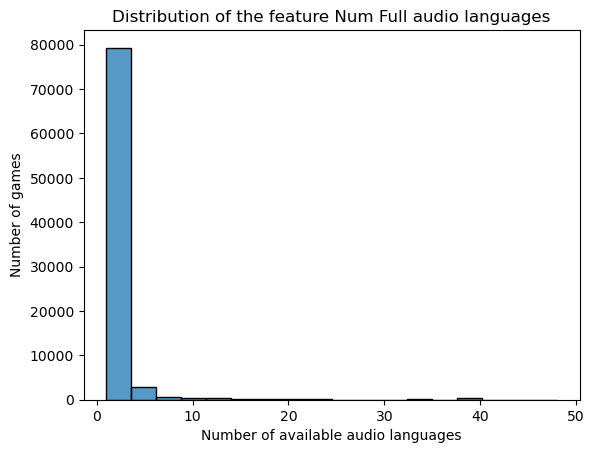

In [35]:
make_histplot('Num Full audio languages', 
              df[df['Num Full audio languages'] < 60], 
              'Number of available audio languages')

**Most games support audio in two or three languages**

In [36]:
df, sorted_audio_lang_df = make_set('Full audio languages', 
                                    'audio_languages_set', df)

In [37]:
df.explode('audio_languages_set')

,AppID,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,Release_date,Price_Group,Num Supported languages,text_languages_set,Num Full audio languages,audio_languages_set
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,[English],[],NaN,True,False,False,0,6,11,30,0,NaN,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008-10-01,< 20$,1,{['English']},1,['']
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"[English, French, Italian, German, Spanish, , ...",[],NaN,True,True,False,0,53,5,12,0,NaN,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017-10-01,< 5$,16,"{ 'Traditional', 'Chinese', 'Japanese', 'Br...",1,['']
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,Jolt Project: The army now has a new robotics ...,"[English, Portuguese, , Brazil]",[],NaN,True,False,False,0,0,0,0,0,NaN,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,2021-11-01,< 5$,4,"{ '', ['English', 'Brazil'], 'Portuguese'}",1,['']
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[English, French, Italian, German, Spanish, , ...",[],NaN,True,True,True,0,3,0,0,0,NaN,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020-07-01,< 10$,15,"{ 'Traditional', 'Chinese', 'Japanese', 'Ch...",1,['']
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"[English, Spanish, , Spain]",[],NaN,True,True,False,0,50,8,17,0,This Game may contain content not appropriate ...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020-02-01,Free,4,"{ '', ['English', 'Spanish', 'Spain']}",1,['']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,2669080,Mannerheim's Saloon Car,"Jan 2, 2024",0 - 0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train c...,"[English, Finnish]",[Finnish],NaN,True,False,False,0,0,0,0,0,NaN,0,0,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo","Single-player,Tracked Controller Support,VR Only","Adventure,Simulation",NaN,2024-01-01,Free,2,"{['English', 'Finnish']}",1,['Finnish']
85099,2736910,Beer Run,"Jan 3, 2024",0 - 0,0,0.00,0,Beer Run is an Indie game created to steal bee...,[English],[],NaN,True,False,False,0,0,0,0,0,NaN,0,0,955 Games,955 Games,Single-player,"Casual,Indie",NaN,2024-01-01,Free,1,{['English']},1,['']
85100,2743220,My Friend The Spider,"Jan 4, 2024",0 - 0,0,0.00,0,A small 'horror' narrative game about isolatio...,[English],[English],NaN,True,False,False,0,0,0,0,0,NaN,0,0,MCA,MCA,Single-player,"Adventure,Simulation",NaN,2024-01-01,Free,1,{['English']},1,['English']
85101,2293130,Path of Survivors,"Jan 8, 2024",0 - 0,0,3.99,0,Path of Survivors is a multi-class auto-battle...,[English],[],NaN,True,False,False,0,0,0,34,0,NaN,0,0,Limited Input,Limited Input,"Single-player,Steam Achievements,Partial Contr...","Action,Casual,Indie,RPG,Simulation",NaN,2024-01-01,< 5$,1,{['English']},1,['']


In [38]:
df['Full audio languages'].explode().value_counts().reset_index()

,Full audio languages,count
0,,57188
1,English,32200
2,Chinese,7789
3,Simplified,4979
4,Spanish,4964
...,...,...
122,Italianbb,1
123,Frenchbb,1
124,Russianrnbb,1
125,Spainrnbb,1


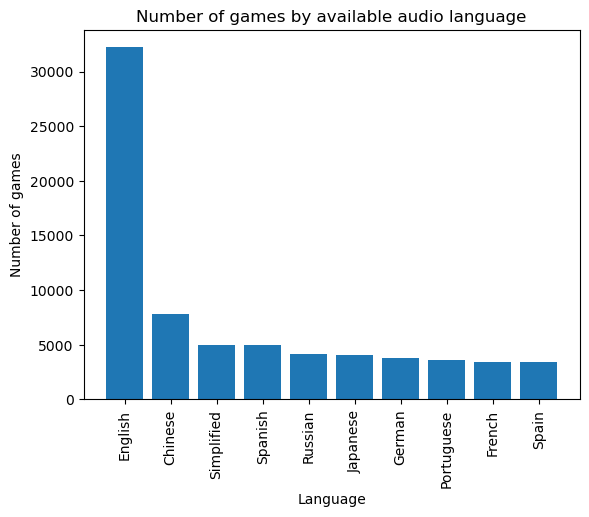

In [39]:
make_barplot('Full audio languages', df, 
             'Language', 'available audio language', rotation=True)

**Both the text and audio of the games are mostly in English**

### Windows, Mac, Linux

In [40]:
print("Number of games available for")
for i in ['Windows', 'Mac', 'Linux']:
    print(f"{i}: {df[i].sum()}")

Number of games available for
Windows: 85073
Mac: 16393
Linux: 11196


**We see that mostly games are released for windows**

### Metacritic score

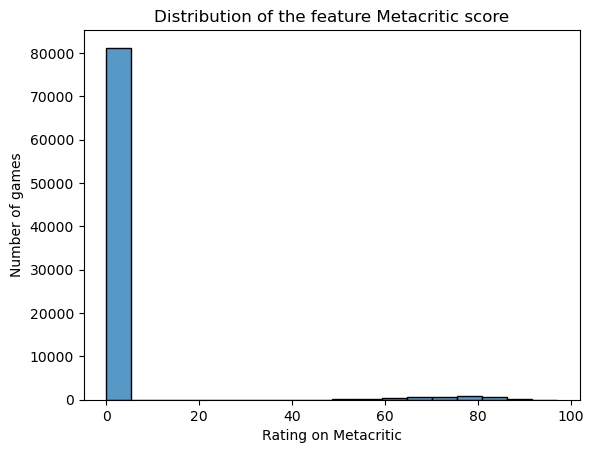

In [41]:
make_histplot('Metacritic score', df, 'Rating on Metacritic')

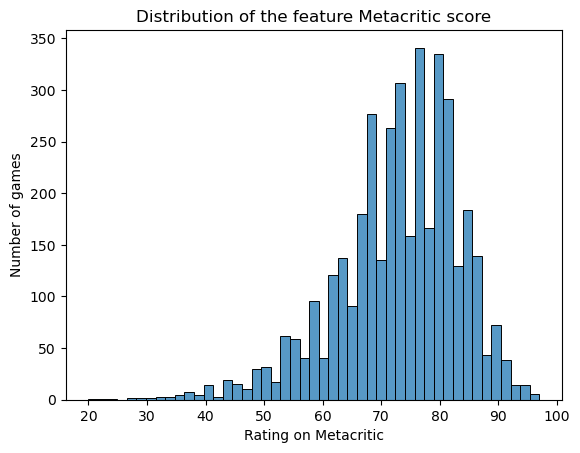

In [42]:
make_histplot('Metacritic score', df[df['Metacritic score'] != 0], 
              'Rating on Metacritic')

**Metacritic score data is available for a small fraction of games. However, for those games that do have a score, the most common is around 65-85**

### Positive, Negative

In [43]:
for feature, name in zip(['Positive', 'Negative'], 
                         ['positive', 'negative']):
    print(f"Number of {name} reviews: {df[feature].sum()}")

Number of positive reviews: 81576407
Number of negative reviews: 13597125


### Achievements

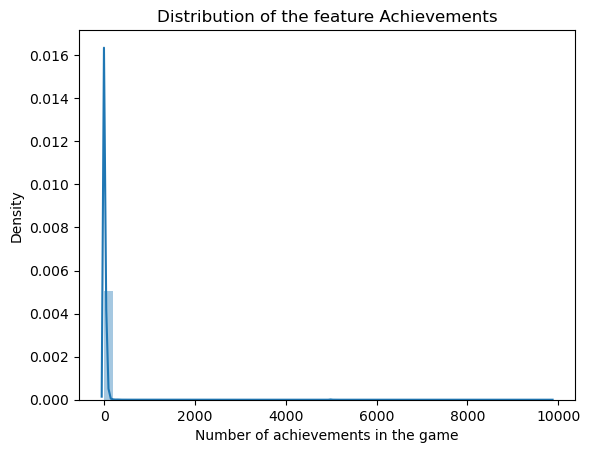

In [44]:
make_distplot('Achievements', df, 'Number of achievements in the game')

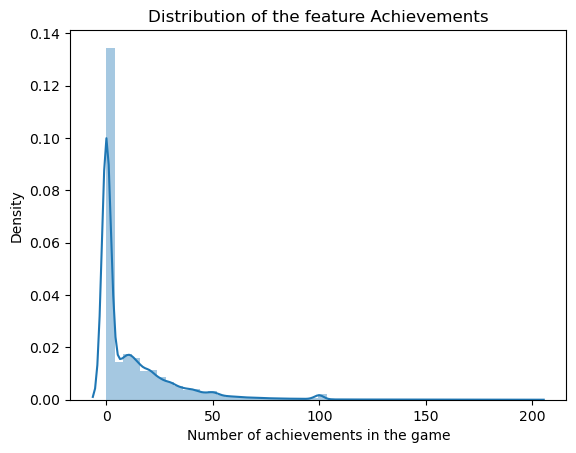

In [45]:
make_distplot('Achievements', df[df['Achievements'] < 200], 
              'Number of achievements in the game')

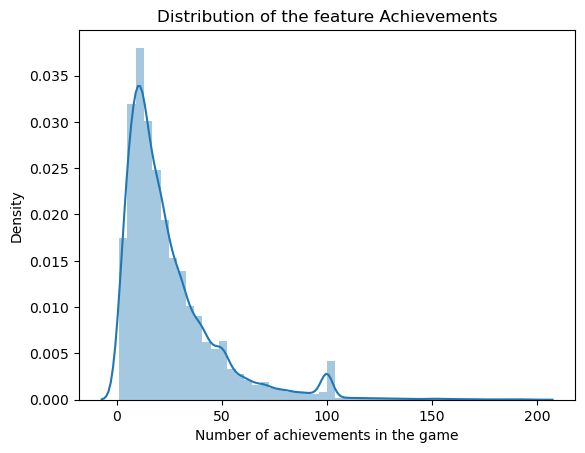

In [46]:
make_distplot('Achievements', df[(df['Achievements'] != 0) 
                                 & (df['Achievements'] < 200)], 
              'Number of achievements in the game')

**Most games with achievements have few (less than 15)**

### Playtime

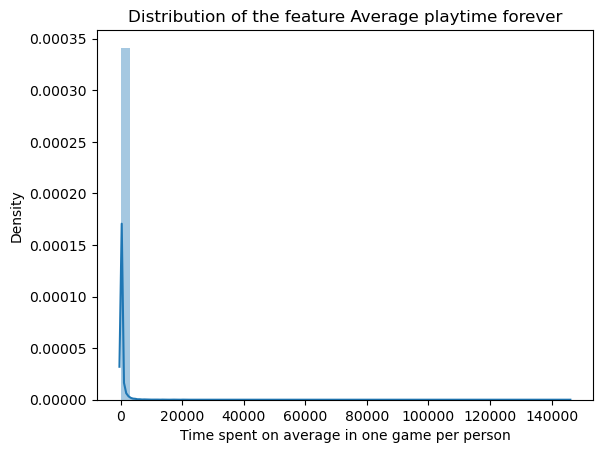

In [47]:
make_distplot('Average playtime forever', df, 
              'Time spent on average in one game per person') 

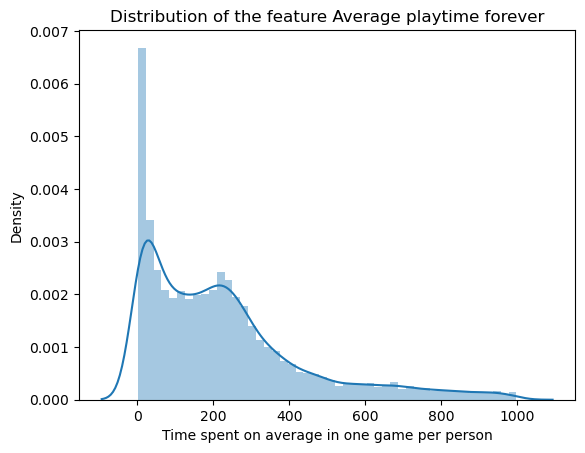

In [48]:
make_distplot('Average playtime forever', 
              df[(df['Average playtime forever'] != 0) 
                 & (df['Average playtime forever'] < 1000)], 
              'Time spent on average in one game per person') 

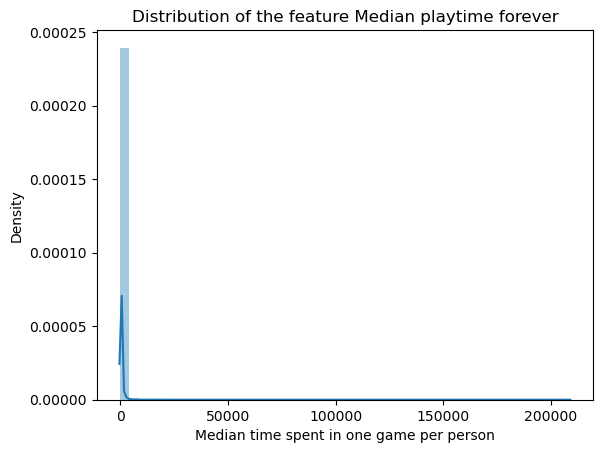

In [49]:
make_distplot('Median playtime forever', df, 
              'Median time spent in one game per person')

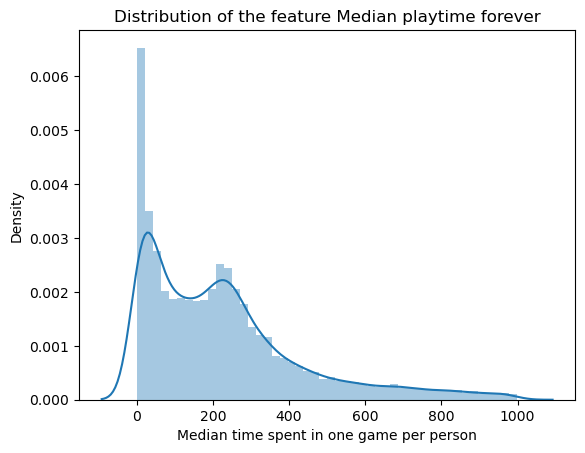

In [50]:
make_distplot('Median playtime forever', 
              df[(df['Median playtime forever'] != 0) 
                 & (df['Median playtime forever'] < 1000)], 
              'Median time spent in one game per person') 

### Notes

In [51]:
df['Notes_type'] = [get_notes_type(note) for note in df['Notes']]

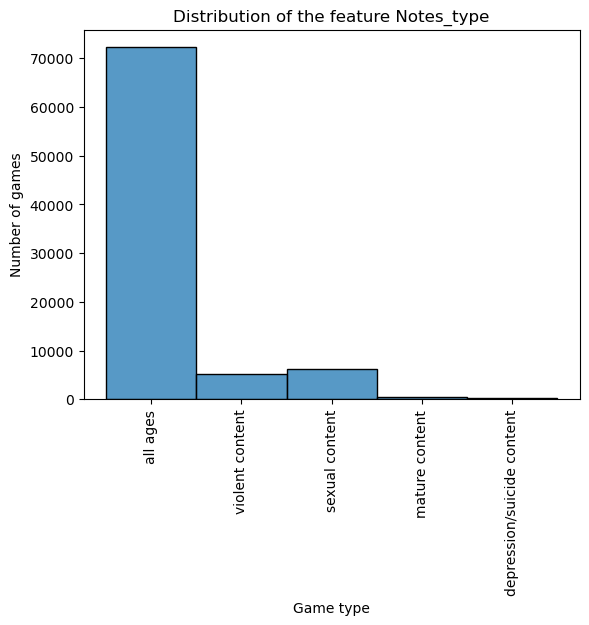

In [52]:
make_histplot('Notes_type', df, 'Game type', rotation=True)

**Mainly games for all ages are represented**

### Developers

In [53]:
df['Developers'].value_counts()

Developers
Choice of Games                        154
Creobit                                138
Laush Dmitriy Sergeevich               138
EroticGamesClub                        119
Boogygames Studios                     117
                                      ... 
Meow Games                               1
rongyou                                  1
DracoSoftware, LLC                       1
playerzklubVRstudios,CrystalMesh UG      1
MCA                                      1
Name: count, Length: 49870, dtype: int64

### Publishers

In [54]:
df['Publishers'].value_counts()

Publishers
Big Fish Games       499
8floor               268
SEGA                 182
HH-Games             173
Strategy First       169
                    ... 
Ginger Tree Games      1
Zeroscale              1
JIW-Games              1
Sneaky Party LLC       1
MCA                    1
Name: count, Length: 43366, dtype: int64

### Categories

In [55]:
df, sorted_categories_df = make_set('Categories', 'categories_set', df)

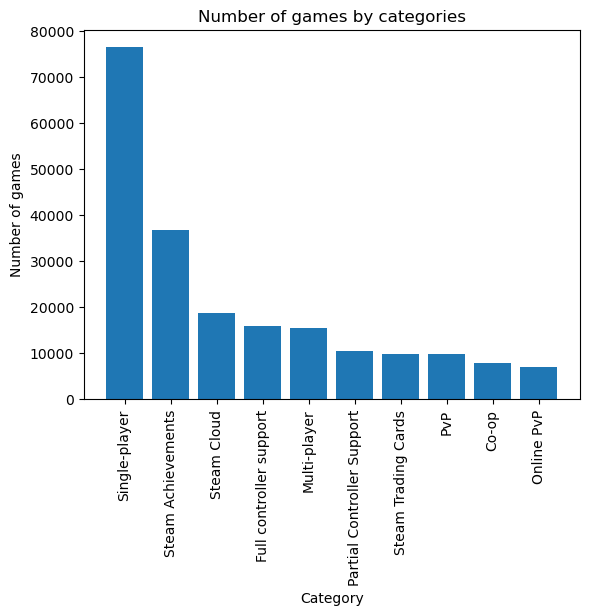

In [56]:
make_barplot('categories_set', df, 
             'Category', 'categories', rotation=True)

### Genres

In [57]:
df, sorted_genres_df = make_set('Genres', 'genres_set', df)

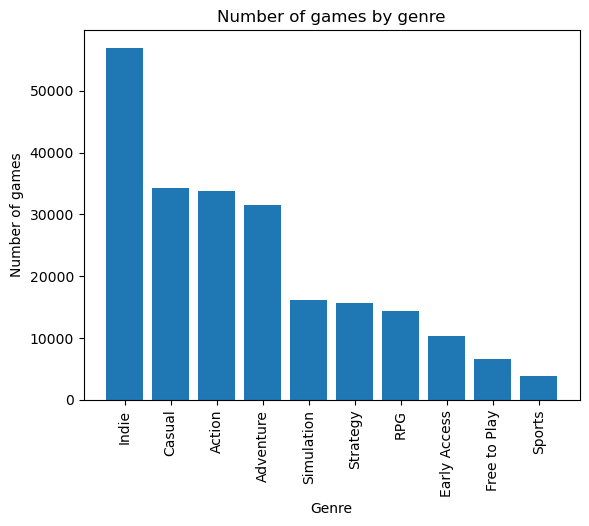

In [58]:
make_barplot('genres_set', df, 
             'Genre', 'genre', rotation=True)

### Tags

In [59]:
df, sorted_tags_df = make_set('Tags', 'tags_set', df)

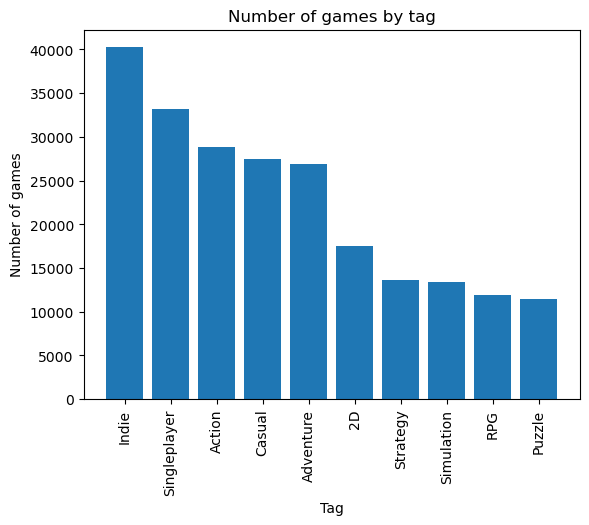

In [60]:
make_barplot('tags_set', df, 
             'Tag', 'tag', rotation=True)

**Mainly indie games without multiplayer are represented in the sample**

# Многофакторный анализ

In [61]:
df['tag_indie'] = df['tags_set'].apply(lambda x: 'indie' in str(x).lower())

df['tag_singleplayer'] = df['tags_set'].apply(lambda x: 'singleplayer' in str(x).lower())
df['category_singleplayer'] = df['categories_set'].apply(lambda x: 'single-player' in str(x).lower())

df['genre_indie'] = df['genres_set'].apply(lambda x: 'indie' in str(x).lower())
df['genre_casual'] = df['genres_set'].apply(lambda x: 'casual' in str(x).lower())
df['genre_action'] = df['genres_set'].apply(lambda x: 'action' in str(x).lower())
df['genre_adventure'] = df['genres_set'].apply(lambda x: 'adventure' in str(x).lower())
df['genre_simulation'] = df['genres_set'].apply(lambda x: 'simulation' in str(x).lower())

In [62]:
df_estown_price = df[(df['Price_Group'].isin(['Free', '< 5$', '< 10$', '< 15$', 
                                              '< 20$', '< 25$'])) &
                      (df['Estimated owners'].isin(['0 - 0', '0 - 20000', 
                                                    '20000 - 50000', '50000 - 100000', 
                                                    '100000 - 200000', '200000 - 500000']))]

## Estimated owners

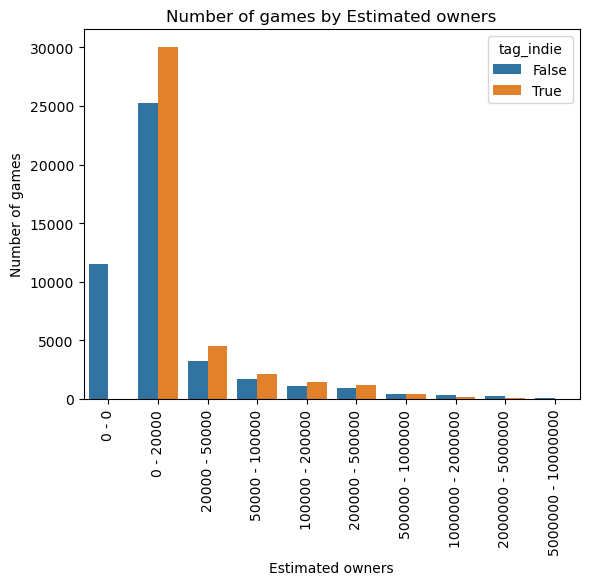

In [63]:
countplot_many_features(df, 'Estimated owners', 'tag_indie', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

**We see that games with an expected very small number of players are less likely to be labeled as indie**

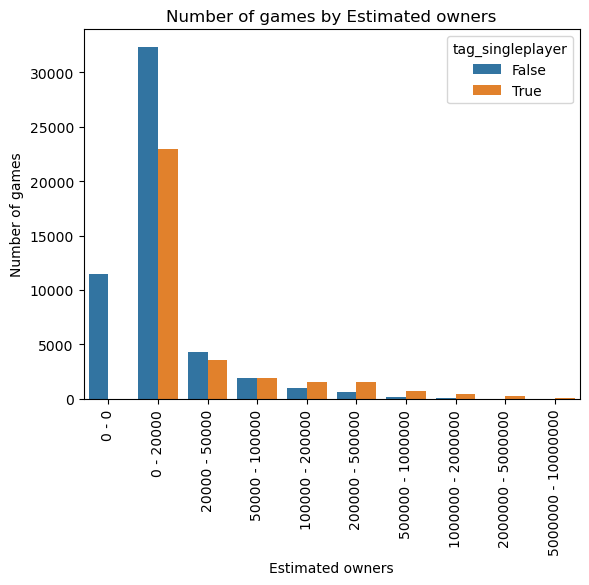

In [64]:
countplot_many_features(df, 'Estimated owners', 'tag_singleplayer', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

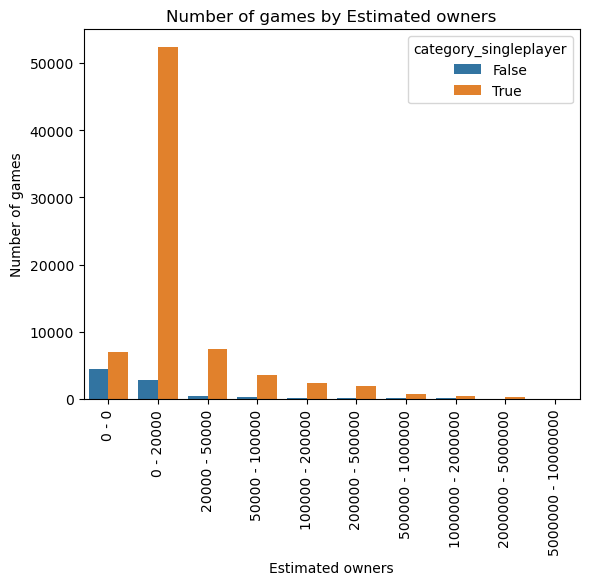

In [65]:
countplot_many_features(df, 'Estimated owners', 'category_singleplayer', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

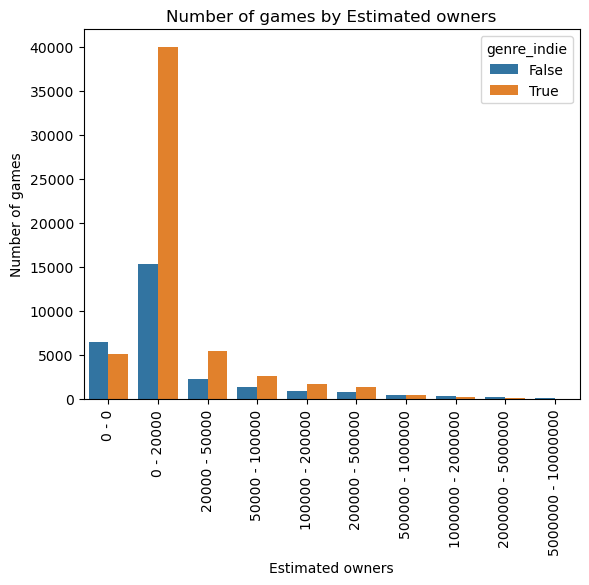

In [66]:
countplot_many_features(df, 'Estimated owners', 'genre_indie', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

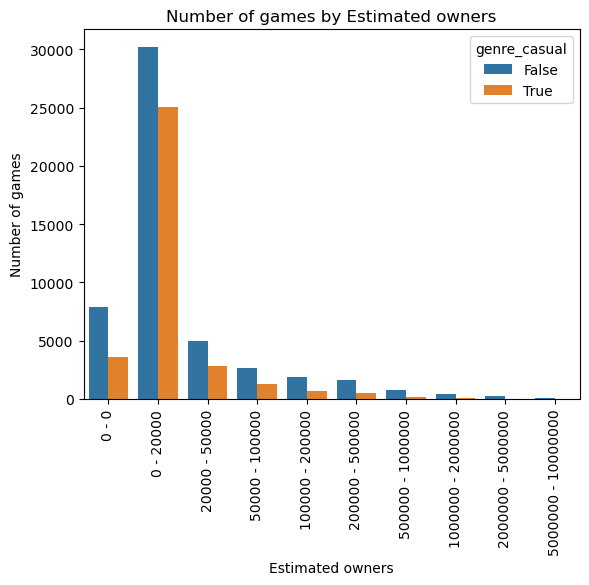

In [67]:
countplot_many_features(df, 'Estimated owners', 'genre_casual', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

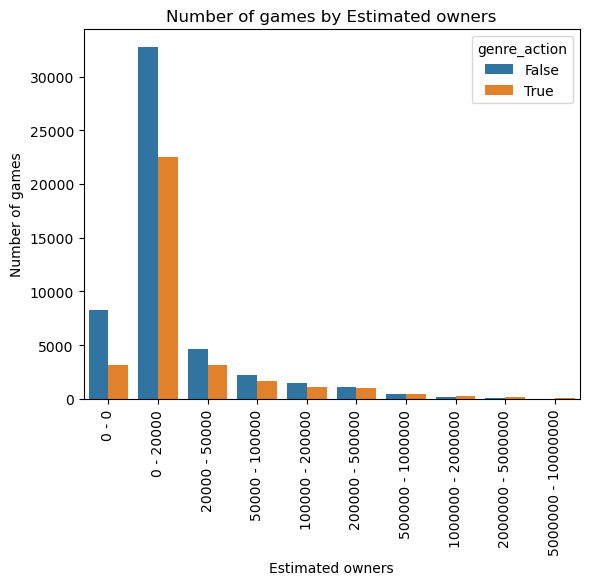

In [68]:
countplot_many_features(df, 'Estimated owners', 'genre_action', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

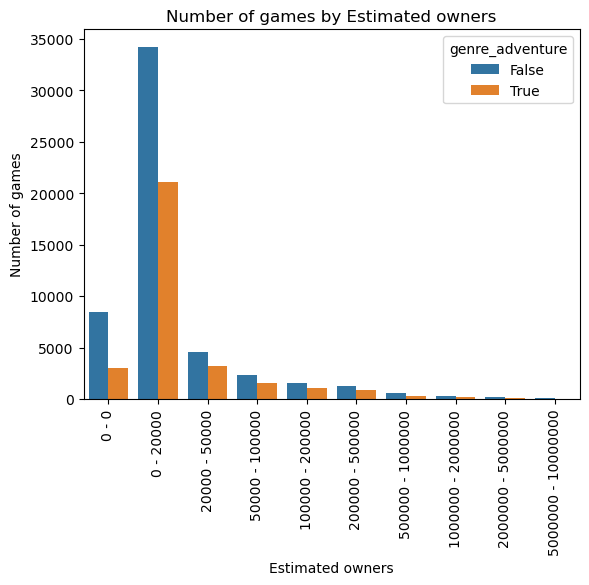

In [69]:
countplot_many_features(df, 'Estimated owners', 'genre_adventure', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

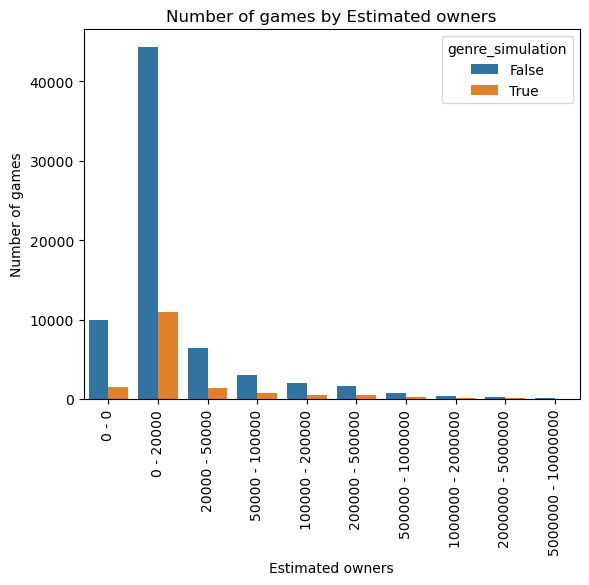

In [70]:
countplot_many_features(df, 'Estimated owners', 'genre_simulation', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

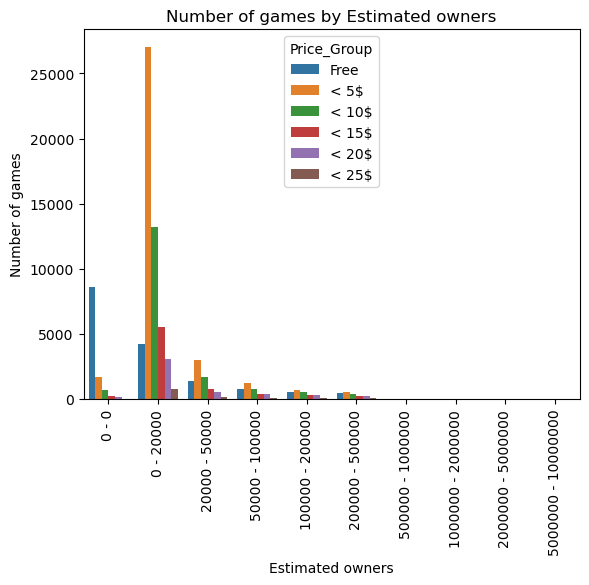

In [71]:
hue_order = ('Free', '< 5$', '< 10$', '< 15$', '< 20$', '< 25$')

feature = 'Estimated owners'
sns.countplot(data=df_estown_price, x=feature, hue='Price_Group', 
              order=sort_range(df['Estimated owners'])[:10], 
              hue_order=hue_order)
plt.xticks(rotation=90)
plt.xlabel(feature)
plt.ylabel('Number of games')
plt.title(f'Number of games by {feature}')
plt.show()

**We see that for free games the expected number of players is very low**

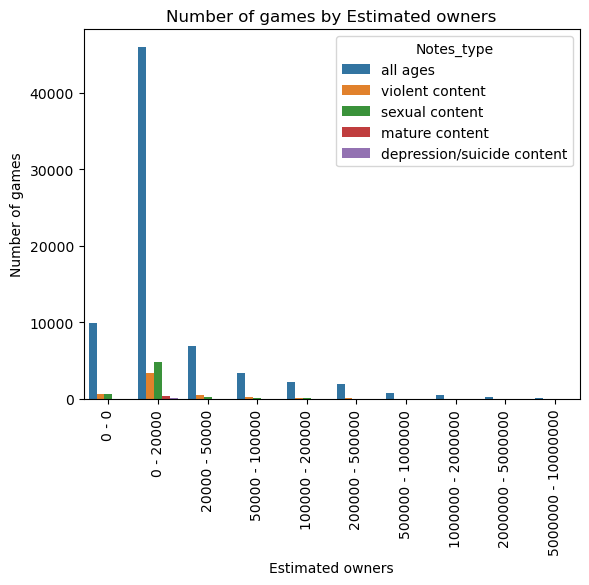

In [72]:
countplot_many_features(df, 'Estimated owners', 'Notes_type', 
                        sort_range(df['Estimated owners'])[:10], rotation=True)

## Price group

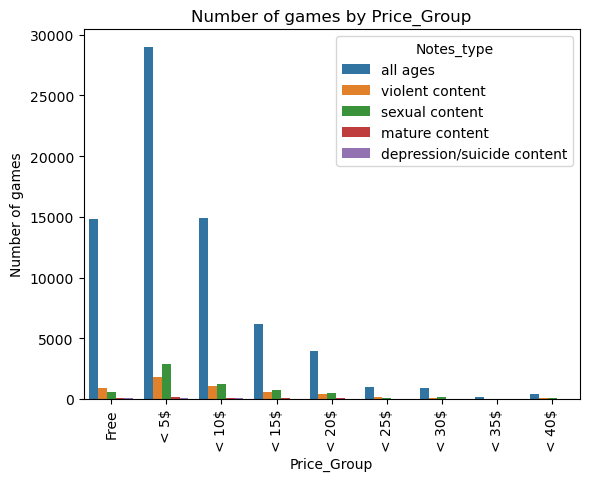

In [73]:
countplot_many_features(df, 'Price_Group', 'Notes_type', 
                        sort_prices(df['Price_Group'])[:9], rotation=True)

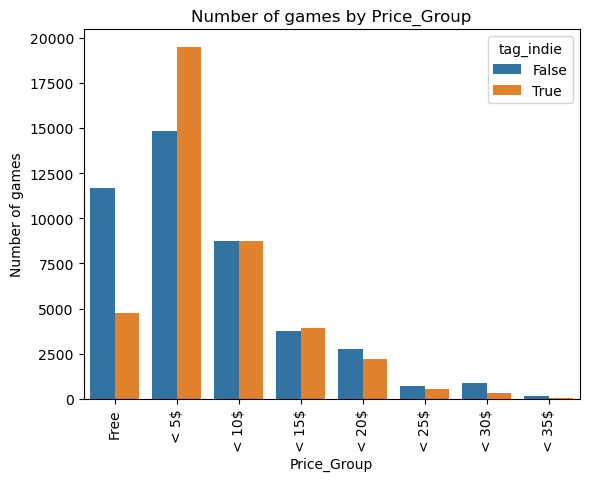

In [74]:
countplot_many_features(df, 'Price_Group', 'tag_indie', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

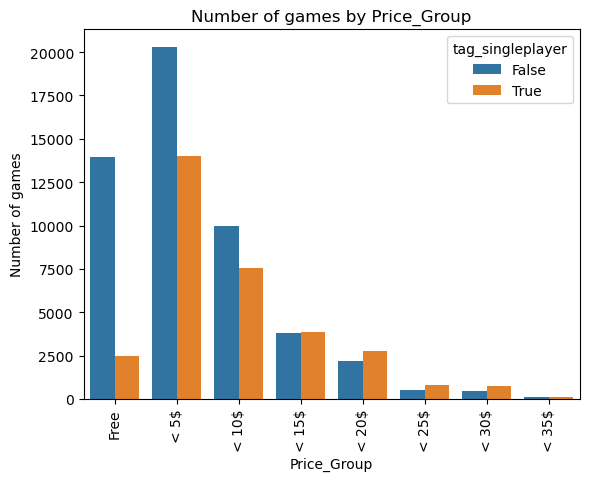

In [75]:
countplot_many_features(df, 'Price_Group', 'tag_singleplayer', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

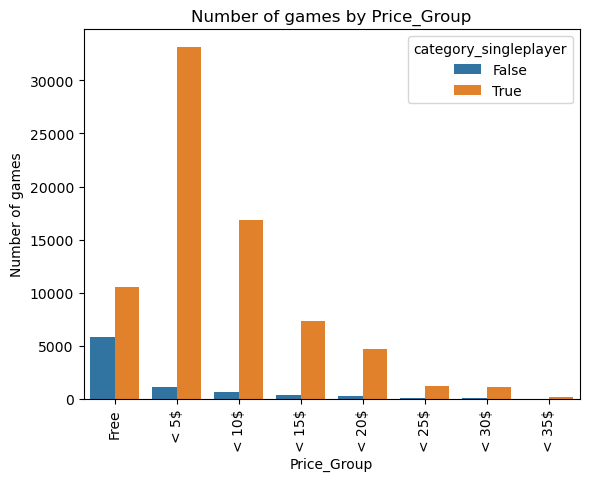

In [76]:
countplot_many_features(df, 'Price_Group', 'category_singleplayer', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

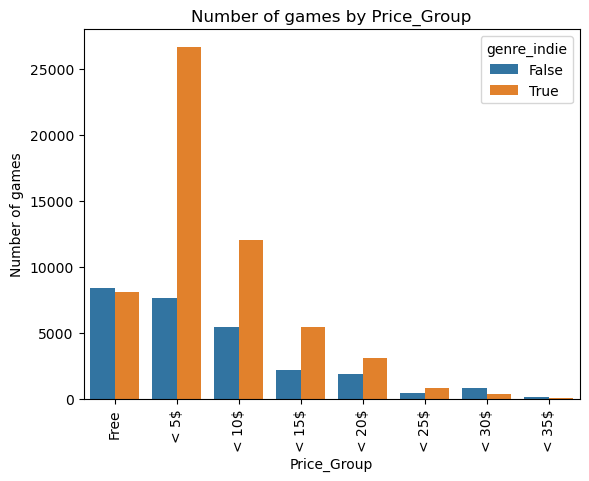

In [77]:
countplot_many_features(df, 'Price_Group', 'genre_indie', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

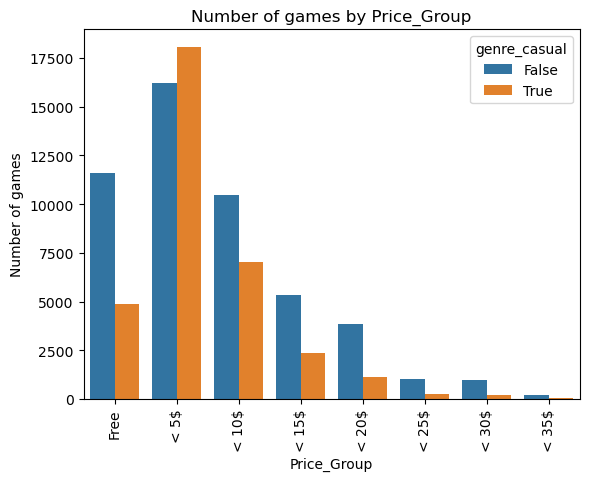

In [78]:
countplot_many_features(df, 'Price_Group', 'genre_casual', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

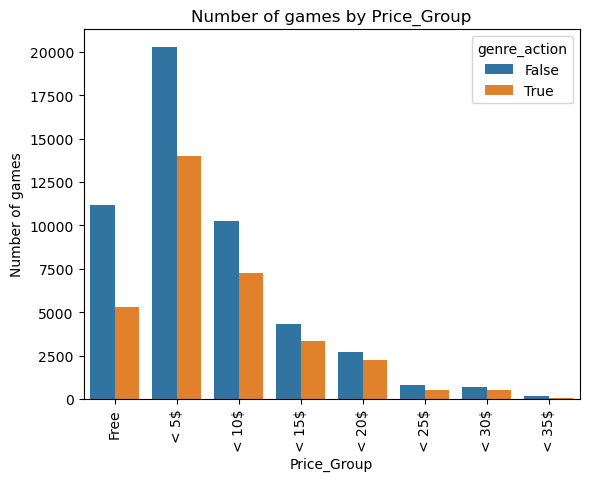

In [79]:
countplot_many_features(df, 'Price_Group', 'genre_action', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

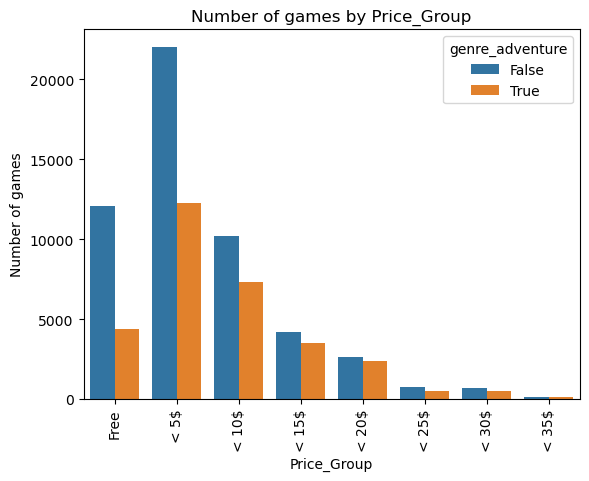

In [80]:
countplot_many_features(df, 'Price_Group', 'genre_adventure', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

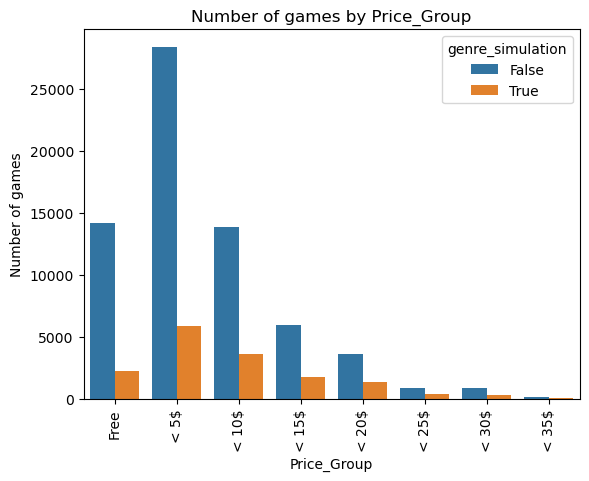

In [81]:
countplot_many_features(df, 'Price_Group', 'genre_simulation', 
                        sort_prices(df['Price_Group'])[:8], rotation=True)

# Correlation analysis

In [82]:
df

,AppID,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,Release_date,Price_Group,Num Supported languages,text_languages_set,Num Full audio languages,audio_languages_set,Notes_type,categories_set,genres_set,tags_set,tag_indie,tag_singleplayer,category_singleplayer,genre_indie,genre_casual,genre_action,genre_adventure,genre_simulation
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,[English],[],NaN,True,False,False,0,6,11,30,0,NaN,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008-10-01,< 20$,1,{['English']},1,{['']},all ages,"{Multi-player, Steam Achievements, Single-play...","{Casual, Indie, Sports}","{Bowling, Casual, Indie, Sports}",True,False,True,True,True,False,False,False
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"[English, French, Italian, German, Spanish, , ...",[],NaN,True,True,False,0,53,5,12,0,NaN,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017-10-01,< 5$,16,"{ 'Traditional', 'Chinese', 'Japanese', 'Br...",1,{['']},all ages,"{Steam Leaderboards, Remote Play on Phone, Rem...","{Action, Indie}","{Indie, Gore, Action, Parody, Fast-Paced, Diff...",True,True,True,True,False,True,False,False
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,Jolt Project: The army now has a new robotics ...,"[English, Portuguese, , Brazil]",[],NaN,True,False,False,0,0,0,0,0,NaN,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,2021-11-01,< 5$,4,"{ '', ['English', 'Brazil'], 'Portuguese'}",1,{['']},all ages,{Single-player},"{Strategy, Adventure, Action, Indie}",NaN,False,False,True,True,False,True,True,False
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[English, French, Italian, German, Spanish, , ...",[],NaN,True,True,True,0,3,0,0,0,NaN,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020-07-01,< 10$,15,"{ 'Traditional', 'Chinese', 'Japanese', 'Ch...",1,{['']},all ages,"{Full controller support, Single-player}","{Casual, Adventure, Indie}","{Indie, Physics, Puzzle-Platformer, Atmospheri...",True,True,True,True,True,False,True,False
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"[English, Spanish, , Spain]",[],NaN,True,True,False,0,50,8,17,0,This Game may contain content not appropriate ...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020-02-01,Free,4,"{ '', ['English', 'Spanish', 'Spain']}",1,{['']},violent content,"{Steam Achievements, Single-player}","{Adventure, Indie}","{Story Rich, Indie, Nudity, Adventure, Violent...",True,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,2669080,Mannerheim's Saloon Car,"Jan 2, 2024",0 - 0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train c...,"[English, Finnish]",[Finnish],NaN,True,False,False,0,0,0,0,0,NaN,0,0,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo","Single-player,Tracked Controller Support,VR Only","Adventure,Simulation",NaN,2024-01-01,Free,2,"{['English', 'Finnish']}",1,{['Finnish']},all ages,"{VR Only, Tracked Controller Support, Single-p...

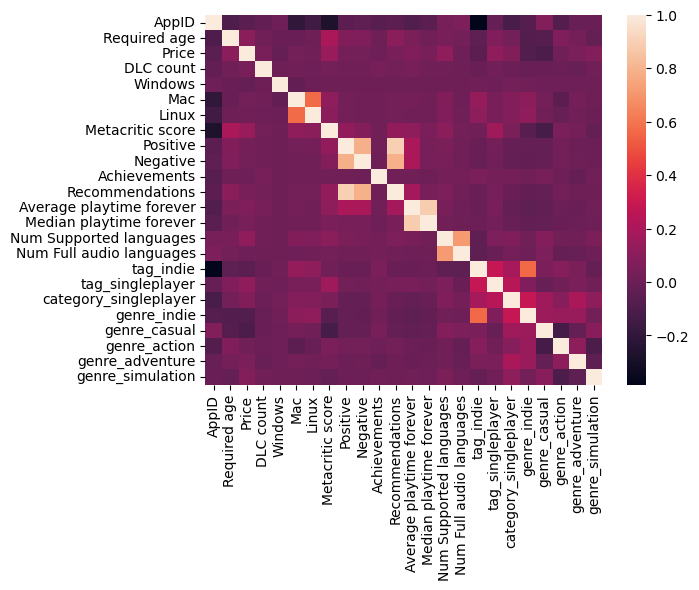

In [83]:
df_num = df.select_dtypes(include=['int', 'float', 'bool'])
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix)
plt.show()

**There are correlated features:**
- Num Supported languages и Num Full audio languages
- Positive/Negative и Recommendations
- Average playtime (forever и two weeks)

### Let's plot the correlated features

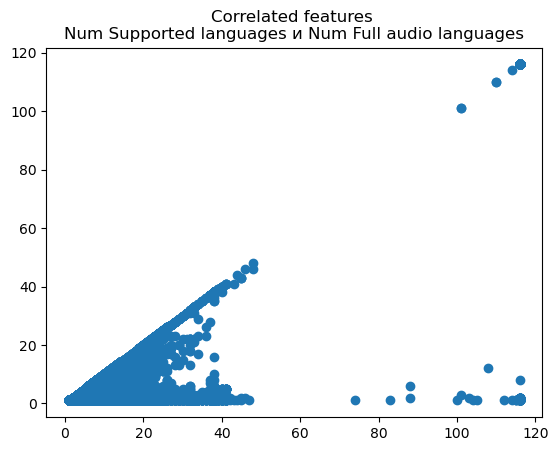

In [84]:
plot_correlated_features(df, 'Num Supported languages', 
                         'Num Full audio languages')

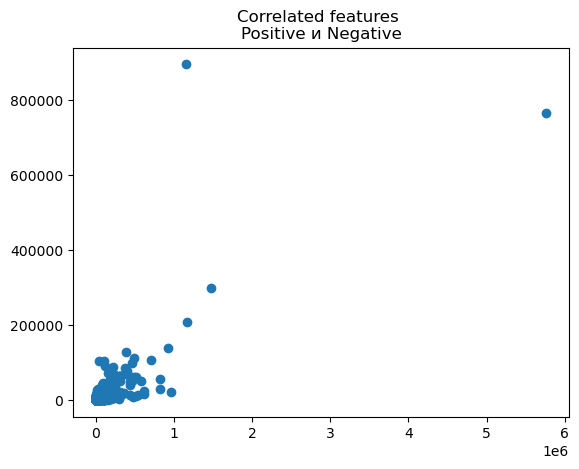

In [85]:
plot_correlated_features(df, 'Positive', 'Negative')

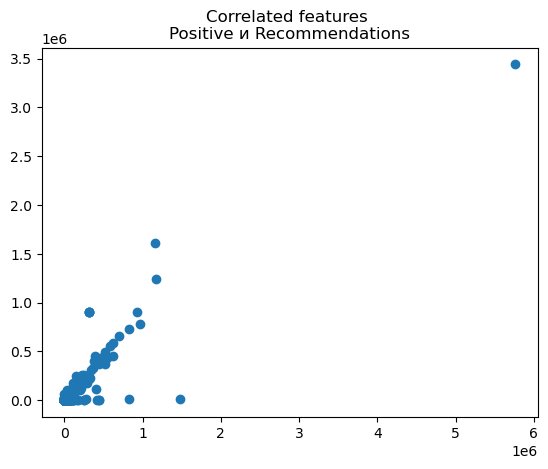

In [86]:
plot_correlated_features(df, 'Positive', 'Recommendations')

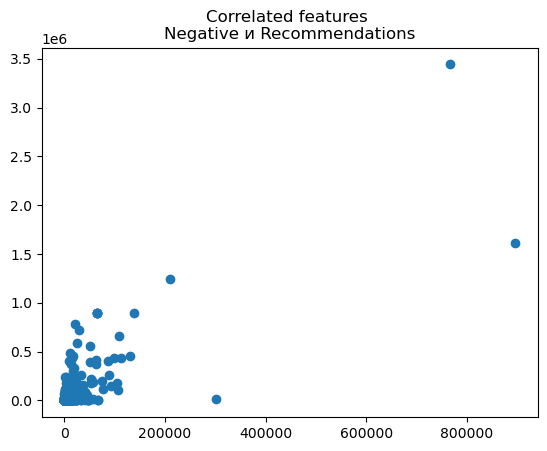

In [87]:
plot_correlated_features(df, 'Negative', 'Recommendations')

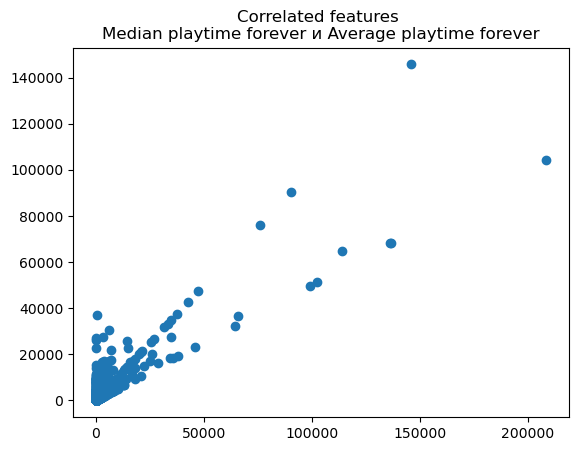

In [88]:
plot_correlated_features(df, 'Median playtime forever', 
                         'Average playtime forever')

# Additional analysis when filtering out "thrash" games

In [89]:
df["TotalReviews"] = df["Positive"] + df["Negative"]

df_popular_50 = df.query("TotalReviews >= 50")
df_popular_70 = df.query("TotalReviews >= 70")
df_popular_100 = df.query("TotalReviews >= 100")

In [90]:
df_popular_50.describe(include=['object'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Notes,Developers,Publishers,Categories,Genres,Tags,Price_Group,text_languages_set,audio_languages_set,Notes_type,categories_set,genres_set,tags_set
count,23297,23297,23297,23259,23297,23297,6292,2871,23297,23153,23108,23265,23296,23297,23297,23297,23146,23108,23265,23296
unique,23185,3982,13,23146,6642,1352,6239,2475,14430,10862,3876,1342,22565,17,5051,1237,5,3871,1323,21865
top,Shadow of the Tomb Raider: Definitive Edition,"Apr 5, 2016",0 - 20000,In Shadow of the Tomb Raider Definitive Editio...,[English],[],“The most ambitious in the modern trilogy” 9/1...,This Game may contain content not appropriate ...,"KOEI TECMO GAMES CO., LTD.",Square Enix,Single-player,"Action,Indie","Indie,Casual",< 5$,{['English']},{['']},all ages,{Single-player},"{Action, Indie}","{Casual, Indie}"
freq,20,36,8590,20,8580,11557,20,44,77,149,2952,1259,40,6523,8580,11557,20443,2952,1259,57


In [91]:
df_popular_70.describe(include=['object'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Notes,Developers,Publishers,Categories,Genres,Tags,Price_Group,text_languages_set,audio_languages_set,Notes_type,categories_set,genres_set,tags_set
count,20268,20268,20268,20237,20268,20268,5740,2485,20268,20143,20117,20237,20267,20268,20268,20268,20137,20117,20237,20267
unique,20164,3906,13,20124,6173,1276,5692,2143,12626,9385,3684,1251,19815,17,4717,1170,5,3681,1233,19291
top,Shadow of the Tomb Raider: Definitive Edition,"Apr 5, 2016",0 - 20000,In Shadow of the Tomb Raider Definitive Editio...,[English],[],“The most ambitious in the modern trilogy” 9/1...,This Game may contain content not appropriate ...,"KOEI TECMO GAMES CO., LTD.",Square Enix,Single-player,"Action,Indie","Indie,Casual",< 5$,{['English']},{['']},all ages,{Single-player},"{Action, Indie}","{Casual, Puzzle, Indie}"
freq,20,33,6228,20,7123,9913,20,40,76,145,2365,1072,19,5294,7123,9913,17797,2365,1072,32


In [92]:
df_popular_100.describe(include=['object'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Notes,Developers,Publishers,Categories,Genres,Tags,Price_Group,text_languages_set,audio_languages_set,Notes_type,categories_set,genres_set,tags_set
count,17381,17381,17381,17355,17381,17381,5131,2170,17381,17273,17262,17356,17380,17381,17381,17381,17265,17262,17356,17380
unique,17285,3796,13,17247,5627,1204,5086,1868,10887,7989,3435,1156,17123,17,4324,1105,5,3432,1140,16737
top,Shadow of the Tomb Raider: Definitive Edition,"Sep 14, 2018",0 - 20000,In Shadow of the Tomb Raider Definitive Editio...,[English],[],“The most ambitious in the modern trilogy” 9/1...,This Game may contain content not appropriate ...,"KOEI TECMO GAMES CO., LTD.",Square Enix,Single-player,"Action,Indie","Casual,Indie,Puzzle",< 5$,{['English']},{['']},all ages,{Single-player},"{Action, Indie}","{Casual, Puzzle, Indie}"
freq,20,32,4202,20,5798,8310,20,36,70,142,1864,893,17,4239,5798,8310,15224,1864,893,28


In [93]:
df.describe(include=['object'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Notes,Developers,Publishers,Categories,Genres,Tags,Price_Group,text_languages_set,audio_languages_set,Notes_type,categories_set,genres_set,tags_set
count,85097,85103,85103,81536,85103,85103,9743,13021,81516,81236,80505,81548,64003,85103,85103,85103,84297,80505,81548,64003
unique,84367,4469,14,81100,11306,2240,9646,10570,49870,43366,5648,2471,57101,17,8490,1992,5,5639,2335,54501
top,Shadow of the Tomb Raider: Definitive Edition,"Jul 14, 2023",0 - 20000,Help the beautiful girls to immerse themselves...,[English],[],“The most ambitious in the modern trilogy” 9/1...,Nakedness. All characters appearing in this ga...,Choice of Games,Big Fish Games,Single-player,"Casual,Indie","Indie,Casual",< 5$,{['English']},{['']},all ages,{Single-player},"{Casual, Indie}","{Casual, Indie}"
freq,20,102,55285,64,43539,49464,20,117,154,499,23990,4811,302,34283,43539,49464,72239,23990,4833,374


**Findings:**
- The most frequent genre was Indie and Casual, after filtering it became Action
- The proportion of observations equal to the most frequent value for different attributes (price group, expected number of players, etc.) decreased, i.e. other groups became more frequent

In [94]:
df.describe(include=['int64','float64'], 
            percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Required age,Price,DLC count,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Num Supported languages,Num Full audio languages,TotalReviews
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04
mean,1.355681e+06,0.312774,7.193703,0.543412,3.348366,9.585609e+02,159.772570,19.859394,7.755176e+02,104.729681,93.316029,4.930907,2.128703,1.118333e+03
std,6.949952e+05,2.254721,12.362478,13.721223,15.421471,2.435920e+04,4574.583903,171.446874,1.789338e+04,1142.447517,1510.732101,10.008075,7.338465,2.808962e+04
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00
1%,3.739020e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00
5%,3.197310e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00
10%,4.320440e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,7.723900e+05,0.000000,0.990000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000e+00
50%,1.331540e+06,0.000000,4.490000,0.000000,0.000000,7.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000e+01
75%,1.918415e+06,0.000000,9.990000,0.000000,0.000000,4.500000e+01,14.000000,18.000000,0.000000e+00,0.000000,0.000000,4.000000,1.000000,6.200000e+01


In [95]:
df_popular_50.describe(include=['int64','float64'], 
                       percentiles=[0.01, 0.05, 0.1, 0.25, 
                                    0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Required age,Price,DLC count,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Num Supported languages,Num Full audio languages,TotalReviews
count,2.329700e+04,23297.000000,23297.000000,23297.000000,23297.000000,2.329700e+04,23297.000000,23297.000000,2.329700e+04,23297.000000,23297.000000,23297.000000,23297.000000,2.329700e+04
mean,8.170556e+05,0.768897,10.464807,1.514272,11.737477,3.484596e+03,577.715071,45.171696,2.812765e+03,367.289007,324.870842,6.812036,2.283942,4.062311e+03
std,5.254485e+05,3.492730,11.553968,25.911368,27.168733,4.646332e+04,8729.640713,302.881990,3.411120e+04,2150.189648,2865.659499,7.485878,3.855080,5.357646e+04
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,5.000000e+01
1%,8.249600e+03,0.000000,0.000000,0.000000,0.000000,2.400000e+01,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,5.100000e+01
5%,1.151080e+05,0.000000,0.000000,0.000000,0.000000,3.700000e+01,5.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,5.600000e+01
10%,2.636320e+05,0.000000,0.000000,0.000000,0.000000,4.600000e+01,8.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,6.400000e+01
25%,3.935200e+05,0.000000,1.990000,0.000000,0.000000,7.200000e+01,20.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,9.800000e+01
50%,7.046400e+05,0.000000,7.990000,0.000000,0.000000,1.810000e+02,49.000000,15.000000,1.350000e+02,28.000000,27.000000,3.000000,1.000000,2.390000e+02
75%,1.162650e+06,0.000000,14.990000,1.000000,0.000000,6.920000e+02,159.000000,33.000000,5.270000e+02,249.000000,241.000000,11.000000,2.000000,8.780000e+02


In [96]:
df_popular_70.describe(include=['int64','float64'], 
                       percentiles=[0.01, 0.05, 0.1, 0.25, 
                                    0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Required age,Price,DLC count,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Num Supported languages,Num Full audio languages,TotalReviews
count,2.026800e+04,20268.000000,20268.000000,20268.000000,20268.000000,2.026800e+04,20268.000000,20268.000000,2.026800e+04,20268.000000,20268.000000,20268.000000,20268.000000,2.026800e+04
mean,7.937129e+05,0.851243,10.911269,1.697553,13.275311,3.998854e+03,661.777482,42.317002,3.233034e+03,415.057233,364.949280,7.102230,2.363973,4.660632e+03
std,5.208926e+05,3.664782,11.851432,27.770900,28.567798,4.979412e+04,9356.372169,268.090346,3.655294e+04,2295.485698,3059.771105,7.557429,3.931671,5.741676e+04
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,7.000000e+01
1%,7.516700e+03,0.000000,0.000000,0.000000,0.000000,3.400000e+01,2.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,7.100000e+01
5%,8.030350e+04,0.000000,0.000000,0.000000,0.000000,5.300000e+01,7.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,7.900000e+01
10%,2.527040e+05,0.000000,0.000000,0.000000,0.000000,6.500000e+01,12.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,8.900000e+01
25%,3.778200e+05,0.000000,1.990000,0.000000,0.000000,1.000000e+02,26.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.340000e+02
50%,6.749350e+05,0.000000,7.990000,0.000000,0.000000,2.400000e+02,63.000000,16.000000,1.800000e+02,63.000000,58.000000,4.000000,1.000000,3.150000e+02
75%,1.138865e+06,0.000000,14.990000,1.000000,0.000000,8.880000e+02,197.250000,35.000000,6.820000e+02,279.000000,264.250000,11.000000,2.000000,1.125250e+03


In [97]:
df_popular_100.describe(include=['int64','float64'], 
                        percentiles=[0.01, 0.05, 0.1, 0.25, 
                                     0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Required age,Price,DLC count,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Num Supported languages,Num Full audio languages,TotalReviews
count,1.738100e+04,17381.000000,17381.000000,17381.000000,17381.000000,1.738100e+04,17381.000000,17381.000000,1.738100e+04,17381.000000,17381.000000,17381.000000,17381.000000,1.738100e+04
mean,7.705627e+05,0.954203,11.398698,1.916288,14.999252,4.652793e+03,768.128589,40.608481,3.769863e+03,468.412519,409.644439,7.412002,2.469190,5.420921e+03
std,5.160532e+05,3.866155,12.224747,29.975286,29.971871,5.374305e+04,10099.695394,241.408600,3.944663e+04,2374.919769,3227.828472,7.628118,4.051841,6.196966e+04
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1.400000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000e+02
1%,6.542000e+03,0.000000,0.000000,0.000000,0.000000,4.800000e+01,3.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.020000e+02
5%,5.852000e+04,0.000000,0.000000,0.000000,0.000000,7.600000e+01,9.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.120000e+02
10%,2.426800e+05,0.000000,0.000000,0.000000,0.000000,9.300000e+01,16.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.260000e+02
25%,3.624100e+05,0.000000,1.990000,0.000000,0.000000,1.410000e+02,35.000000,0.000000,1.040000e+02,0.000000,0.000000,1.000000,1.000000,1.890000e+02
50%,6.452600e+05,0.000000,9.990000,0.000000,0.000000,3.240000e+02,83.000000,17.000000,2.480000e+02,107.000000,98.000000,4.000000,1.000000,4.230000e+02
75%,1.113680e+06,0.000000,15.990000,1.000000,0.000000,1.192000e+03,250.000000,36.000000,8.950000e+02,317.000000,294.000000,12.000000,2.000000,1.467000e+03


**Conclusions:**
- Price - when adding any filter, the average price increases by 1.5 times
- Metacritic Score - when any filter is added, scores appear at the 90th percentile
- Average/Median Playtime Forever - signs were non-variable, after filtering they became more variable.

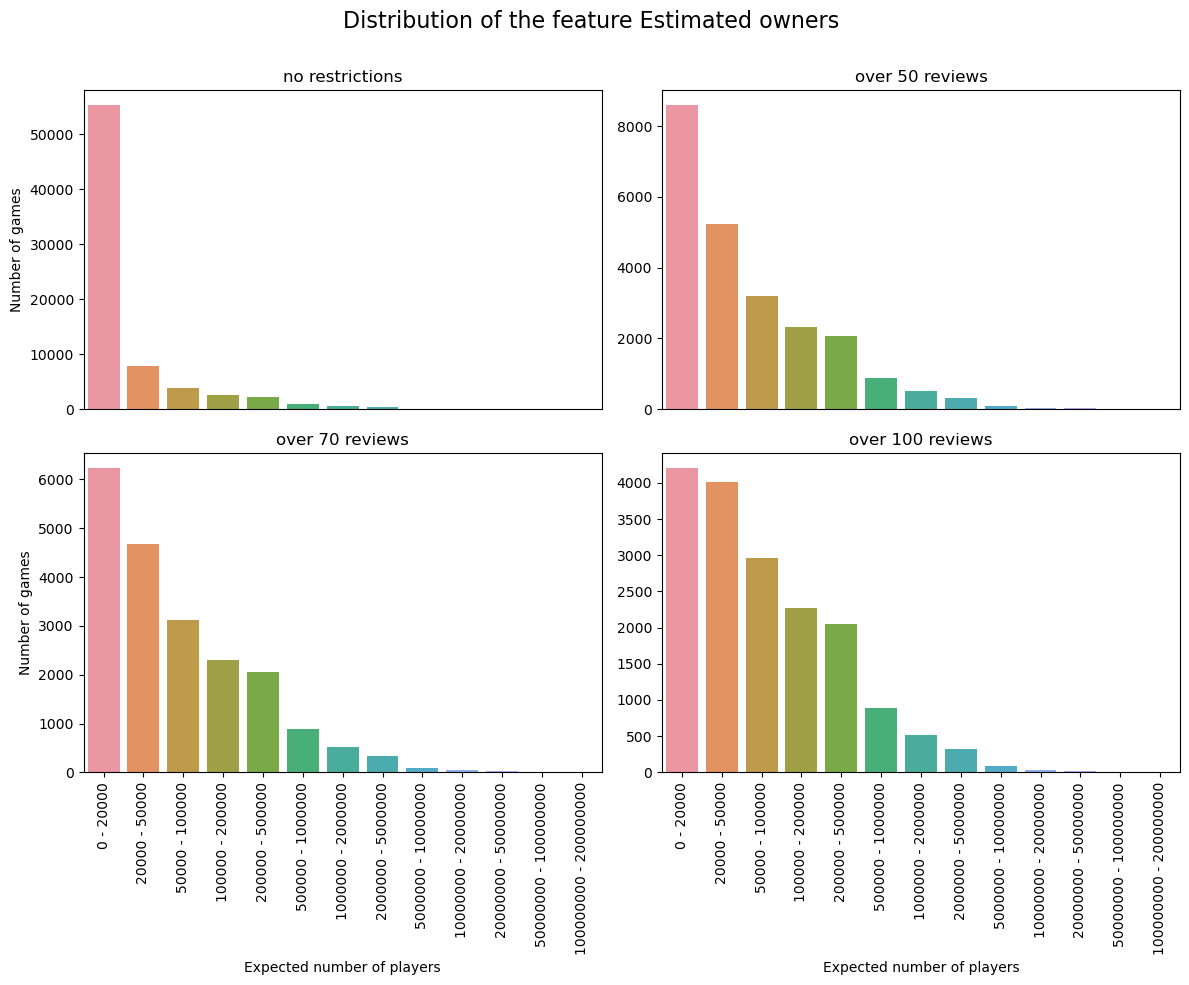

In [98]:
make_countplot_filtr('Estimated owners', [df, df_popular_50, df_popular_70, df_popular_100], 
                     'Expected number of players',
                     order = sort_range(df['Estimated owners'])[1:], rotation=True)

**We see that with filters on the number of reviews there are more games with a high expected number of players than without filters. This difference remains even with a less stringent filter of >50 reviews**

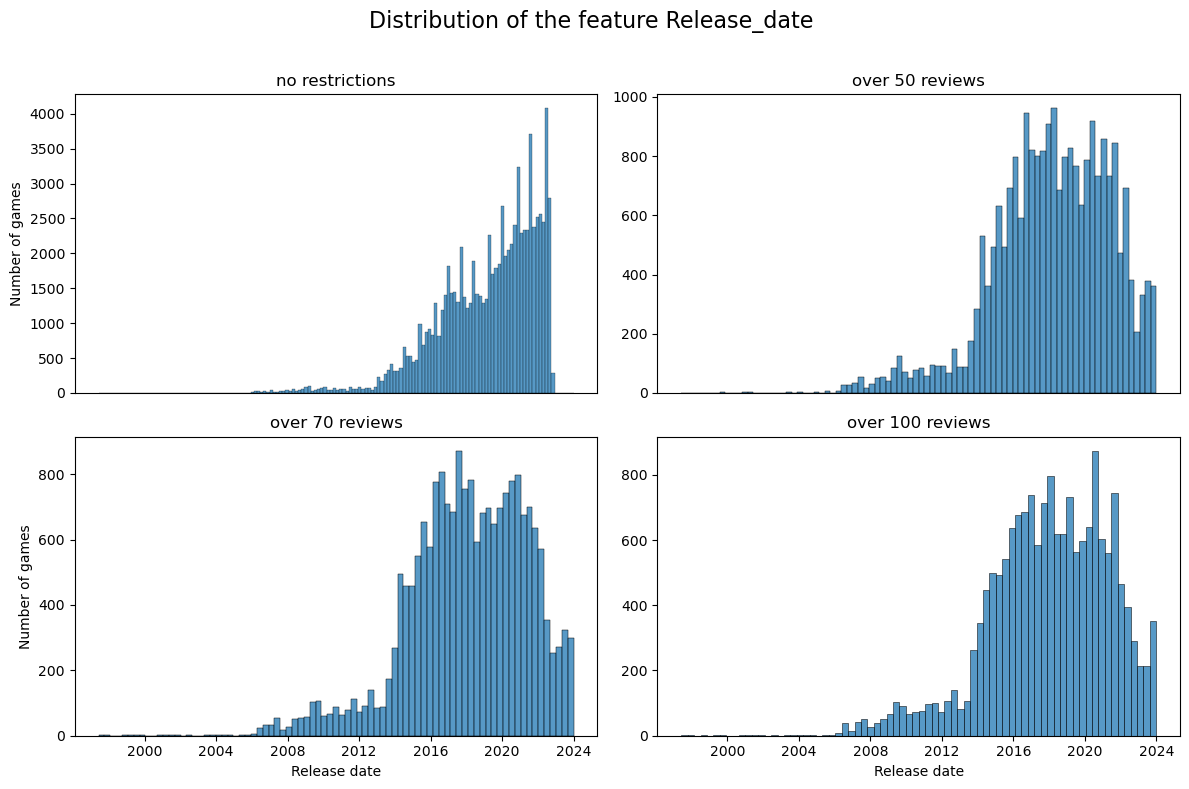

In [99]:
make_histplot_filtr('Release_date', 
                    [df, df_popular_50, df_popular_70, df_popular_100], 
                    'Release date')

**We see that with filters on the number of reviews there is a much larger share of old games and less of new ones than without filters. This difference remains even with a less stringent filter of >50 reviews**

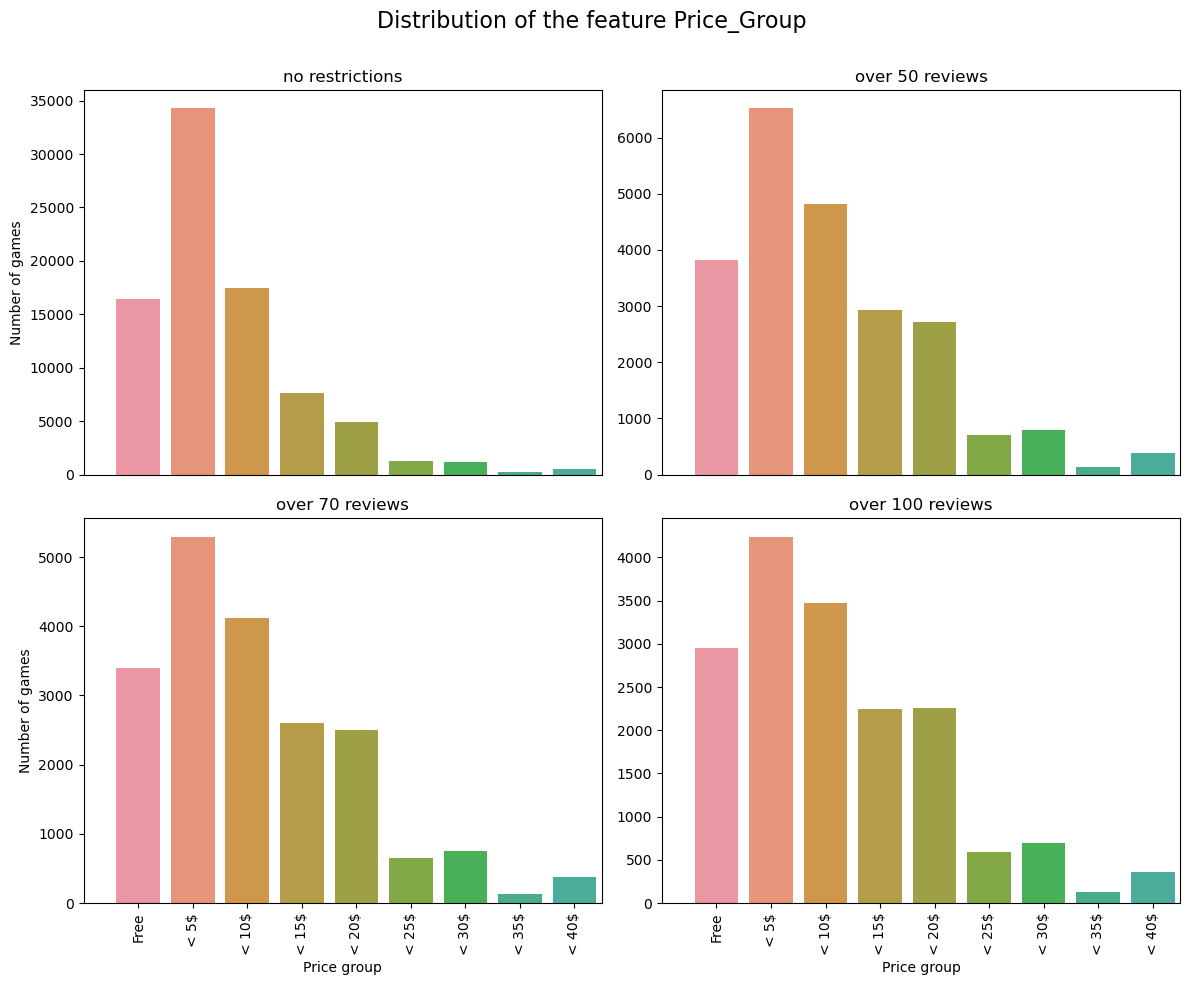

In [100]:
make_countplot_filtr('Price_Group', [df, df_popular_50, df_popular_70, df_popular_100], 
                     'Price group', 
                     order = sort_prices(df['Price_Group']), 
                     rotation=True, limit = 8)

**We see that with filters on the number of reviews the share of expensive games is much higher than without filters. This difference remains even with a less stringent filter of >50 reviews**

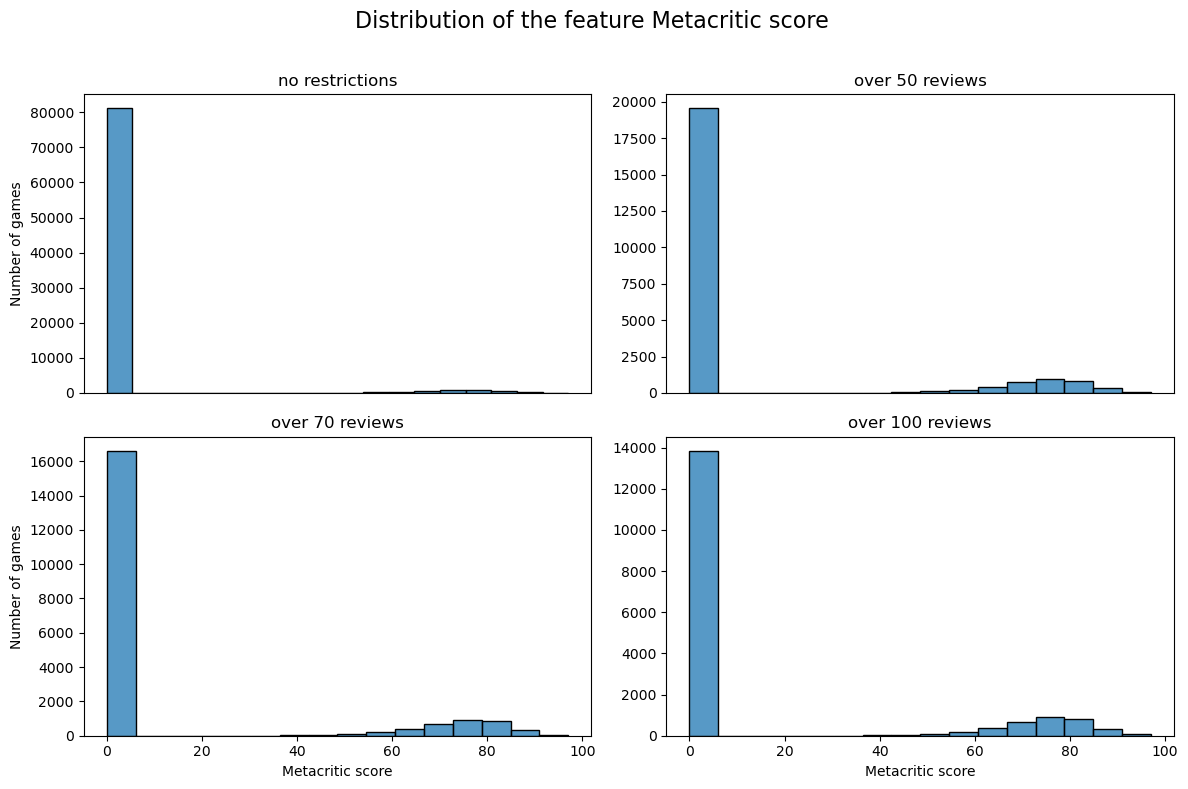

In [101]:
make_histplot_filtr('Metacritic score', 
                    [df, df_popular_50, df_popular_70, df_popular_100], 
                    'Metacritic score')

**We see that with filters on the number of reviews there are much more games with metacritic scores than without filters. This difference remains even with a less stringent filter of >50 reviews**

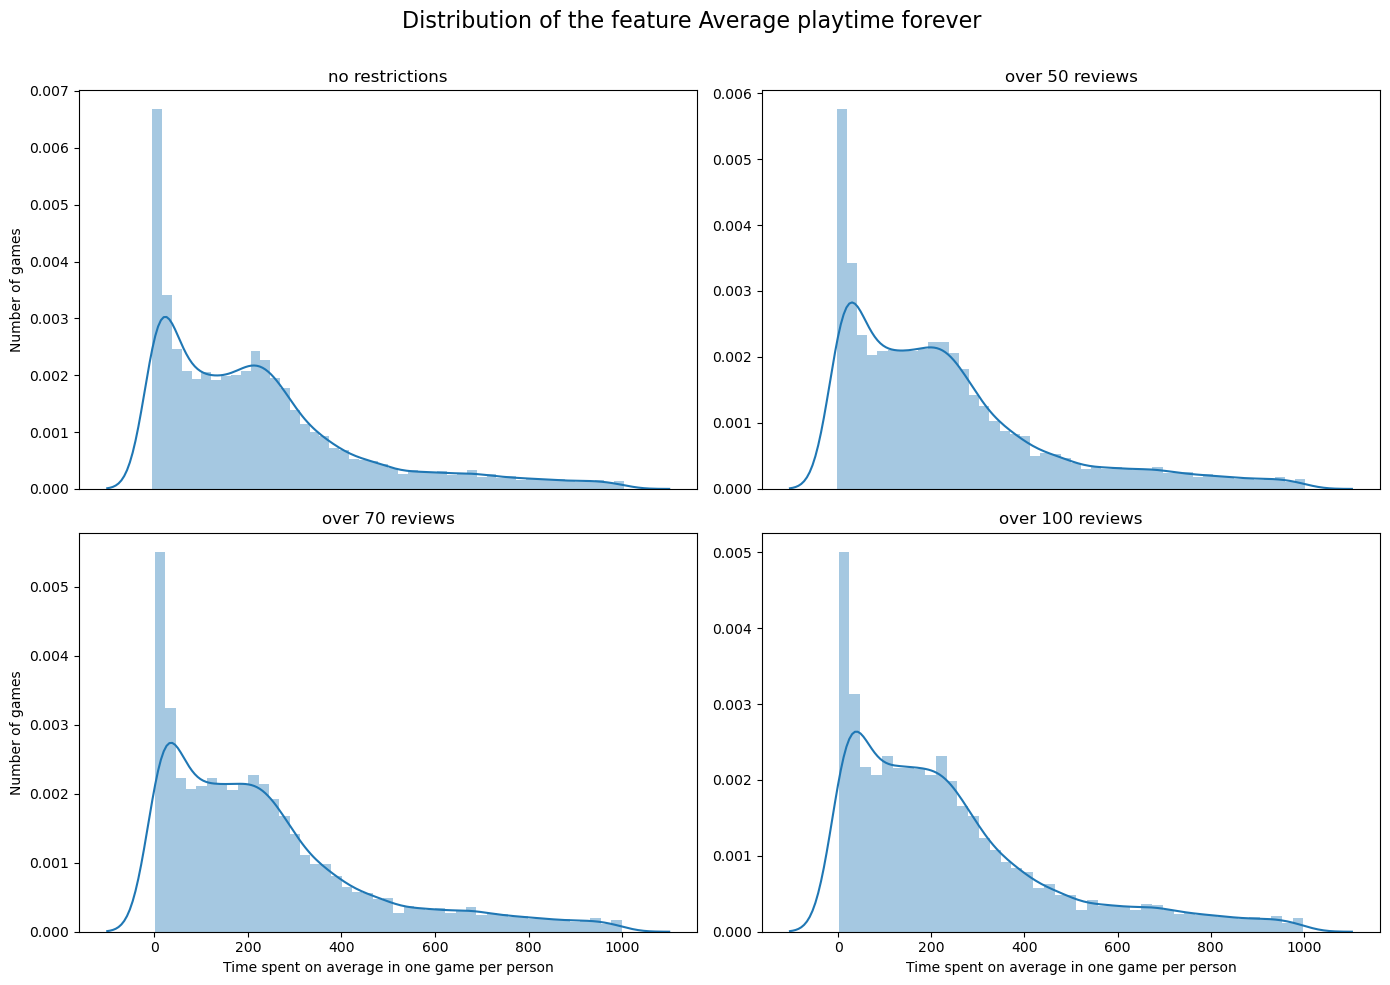

In [102]:
make_distplot_filtr('Average playtime forever', 
                    [df, df_popular_50, df_popular_70, df_popular_100], 
                    'Time spent on average in one game per person', 
                    x_min = 0, x_max = 1000)

**We see that with the filter for the number of reviews over 100 the graph is smoother than without the filter, this difference is less pronounced with the filter over 70 reviews and disappears with the filter over 50 reviews**

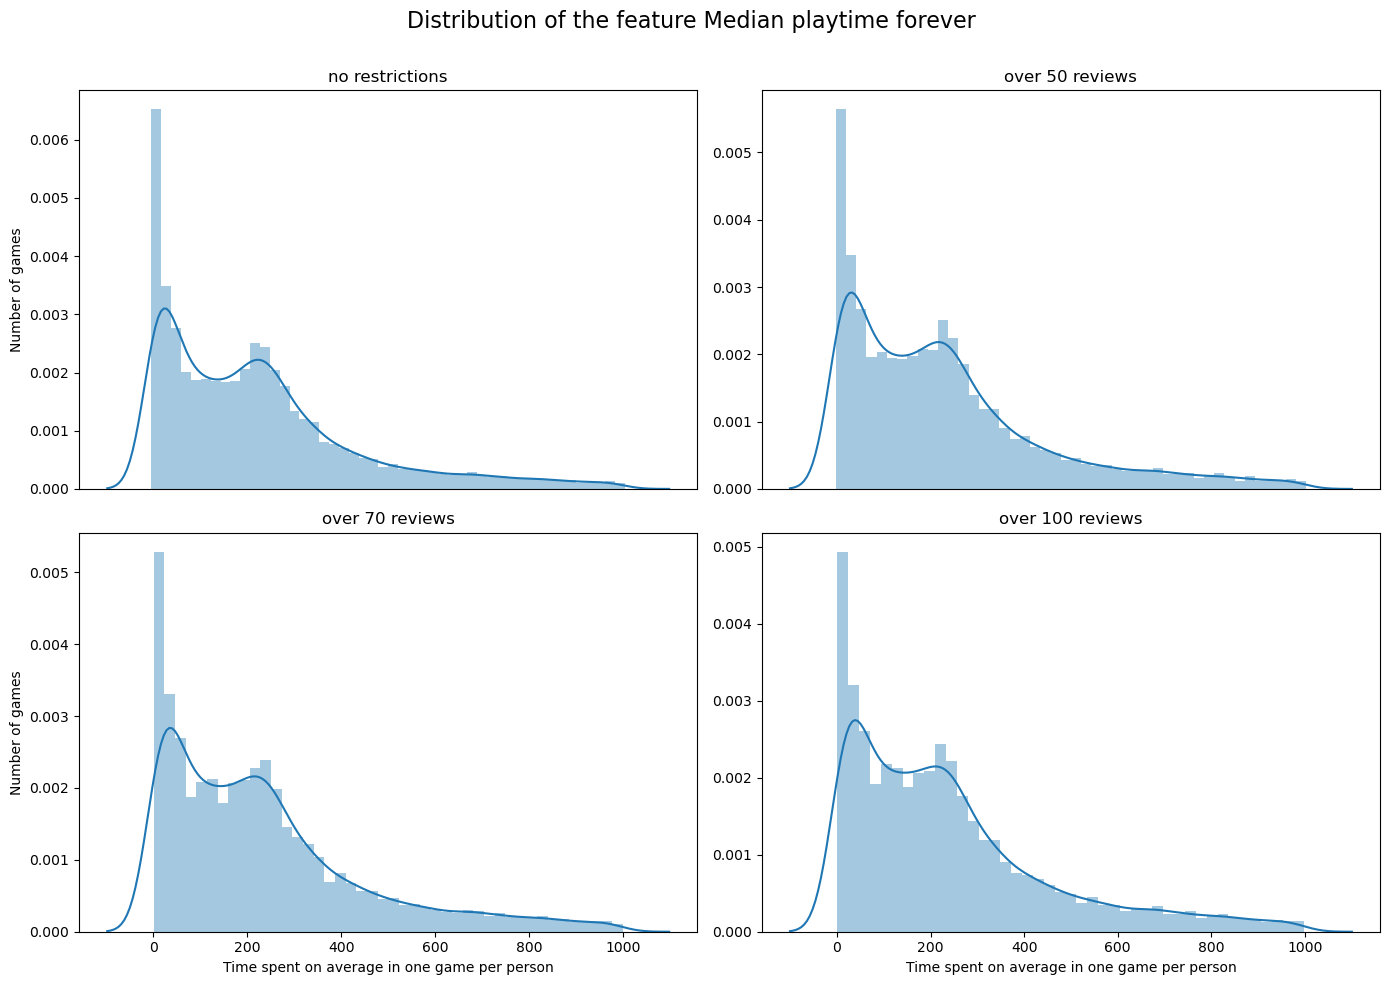

In [103]:
make_distplot_filtr('Median playtime forever', 
                    [df, df_popular_50, df_popular_70, df_popular_100], 
                    'Time spent on average in one game per person', 
                    x_min = 0, x_max = 1000)

**We see that with a hard filter of more than 100 reviews the graph becomes smoother, but this difference is not as noticeable. And even more so, it is not visible with filters over 50 and 70 reviews**

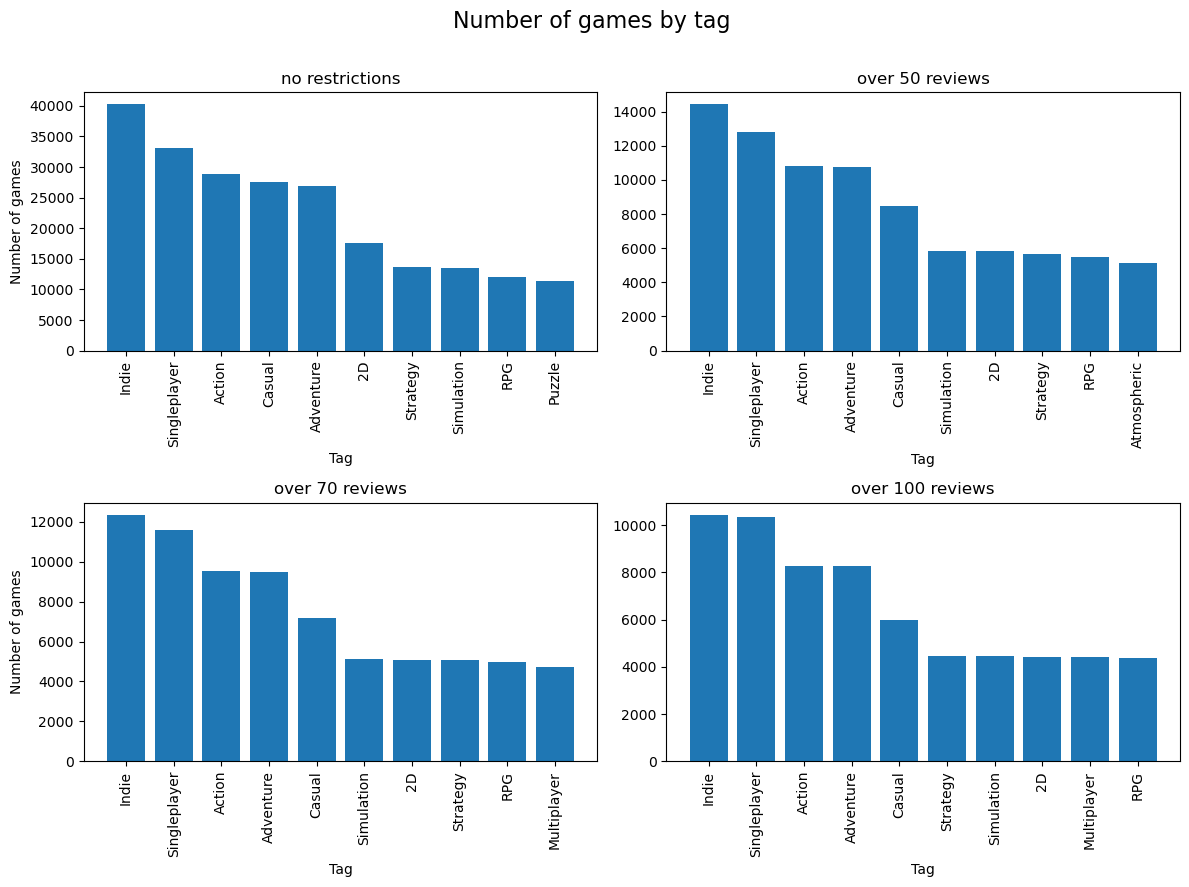

In [104]:
make_barplot_filtr('tags_set', 
                   [df, df_popular_50, df_popular_70, df_popular_100], 
                   'Tag', 'tag', rotation=True)

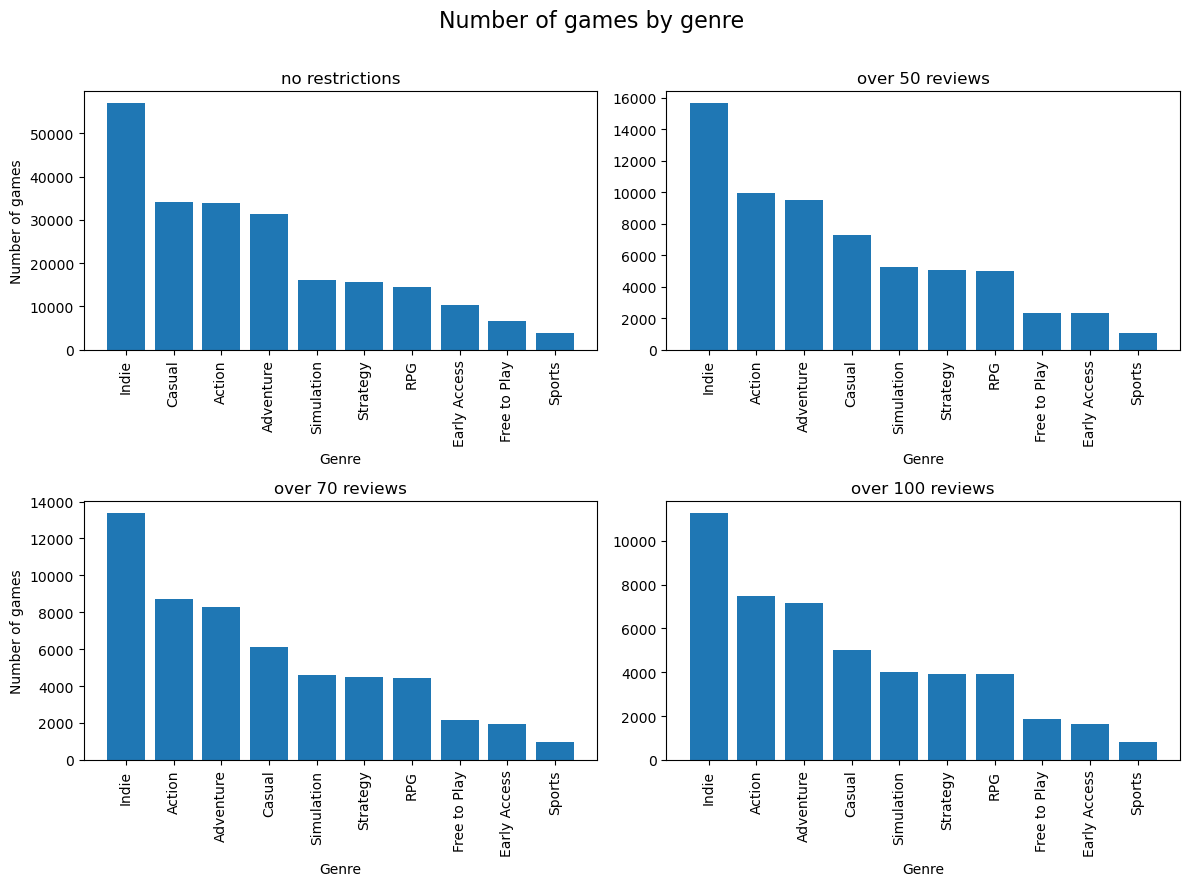

In [105]:
make_barplot_filtr('genres_set', 
                   [df, df_popular_50, df_popular_70, df_popular_100],
                   'Genre', 'genre', rotation=True)

**We see that with any restriction the changes are insignificant, but the order of popular genres/tags etc. changes slightly**

# CONCLUSIONS

1) Popular games in the dataset are about 23 thousand, the rest of the games are "trash": they have few reviews and the expected number of players for them is also small (even when using a filter of at least 50 reviews to determine popular games).

2) Popular games show different trends from the whole set of games (they have a higher price, higher expected number of players, they are older, they are dominated not only by the indie genre but also by action, they also have more user ratings on metacritic).  

3) For the recommendation system we should use popular games, filter for 50 games (to leave as many games as possible for users to choose from) and take into account their trends for further work.